# Exploratory Data Analysis and Visualization

In [1]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
studydata = pd.read_csv('studydata.csv')
studydata.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [3]:
print("Data type : ", type(studydata))
print("Data dims : ", studydata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1000, 8)


In [4]:
# Information about the Variables
studydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
studydata.describe()


math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [6]:
studydata['gender'].unique()

array(['female', 'male'], dtype=object)

In [7]:
studydata['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [8]:
studydata['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [9]:
studydata['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [10]:
studydata['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

Number of each Race/Ethnicity in dataset


Number of Races : 5
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64


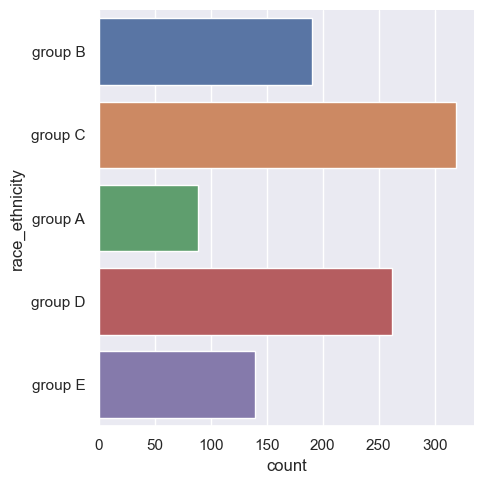

In [11]:
# Generations in the Dataset
print("Number of Races :", len(studydata["race_ethnicity"].unique()))

# Pokemons in each Generation
print(studydata["race_ethnicity"].value_counts())
sb.catplot(y = "race_ethnicity", data = studydata, kind = "count")

Different Parental Level of Education in Dataset

Number of Levels of Education : 6
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64


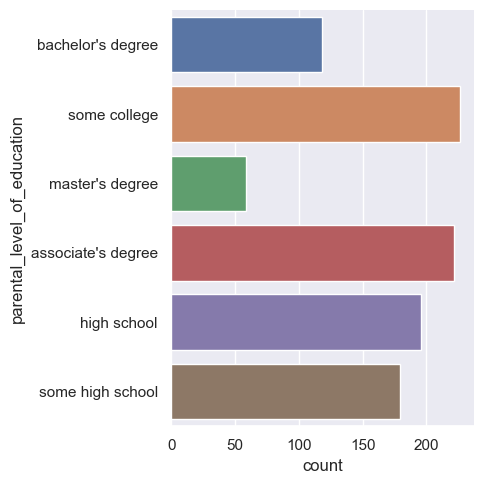

In [12]:
# Generations in the Dataset
print("Number of Levels of Education :", len(studydata["parental_level_of_education"].unique()))

# Pokemons in each Generation
print(studydata["parental_level_of_education"].value_counts())
sb.catplot(y = "parental_level_of_education", data = studydata, kind = "count")

Distribution of gender

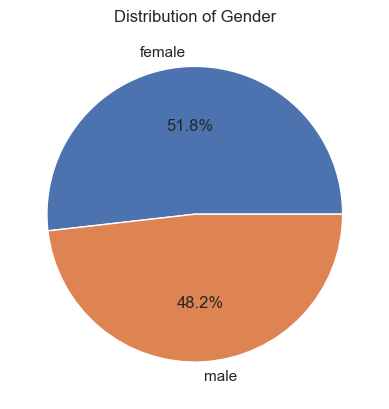

In [13]:
count_gender = studydata['gender'].value_counts()
gender = count_gender.index

plt.title('Distribution of Gender')
plt.pie(count_gender, labels = gender, autopct='%.1f%%')
plt.show()


Distribution of Test Preparation

<Axes: xlabel='test_preparation_course', ylabel='count'>

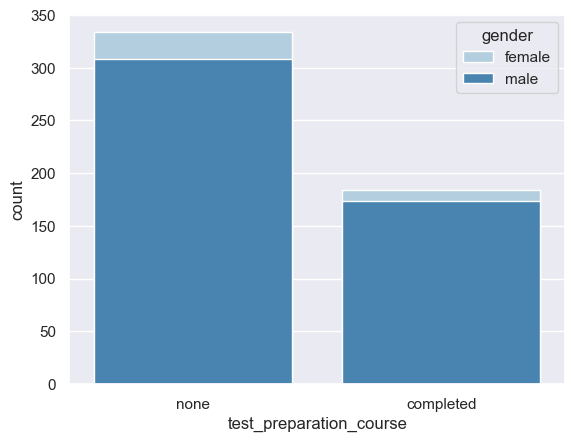

In [14]:
sb.countplot(x='test_preparation_course', 
    data = studydata, 
    hue='gender',
    dodge=False,
    palette='Blues')

Distribution of Lunch

<Axes: xlabel='gender', ylabel='count'>

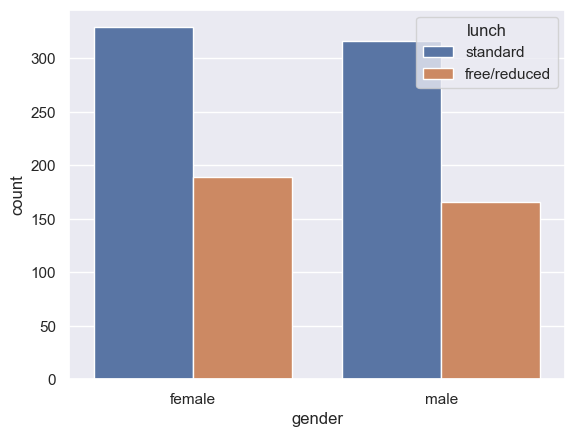

In [15]:
sb.countplot(data = studydata, x = 'gender', hue = 'lunch')


Check the distributions of scores by each subject

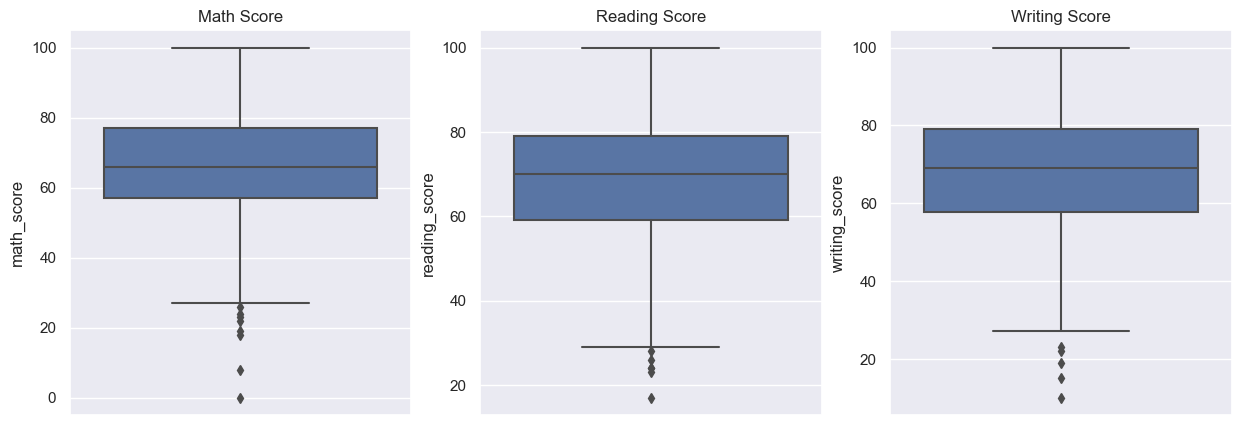

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sb.boxplot(data=studydata, y='math_score')
plt.title('Math Score')

plt.subplot(1, 3, 2)
sb.boxplot(data=studydata, y='reading_score')
plt.title('Reading Score')

plt.subplot(1, 3, 3)
sb.boxplot(data=studydata, y='writing_score')
plt.title('Writing Score')

plt.show()

Check scatter plot of scores between each subject

<Axes: xlabel='reading_score', ylabel='writing_score'>

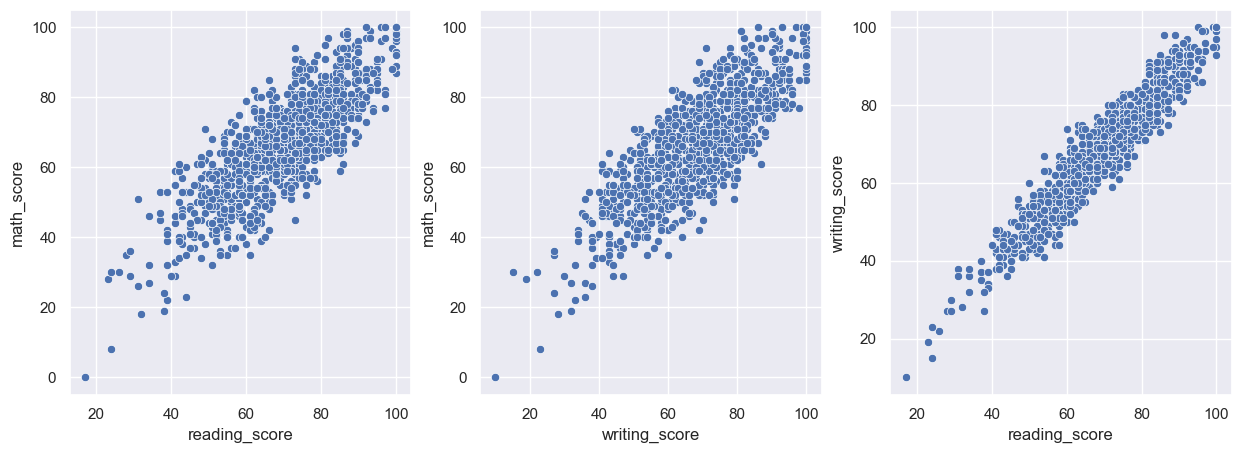

In [17]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sb.scatterplot(data=studydata, x = 'reading_score', y = 'math_score')

plt.subplot(1, 3, 2)
sb.scatterplot(data=studydata, x = 'writing_score', y = 'math_score')

plt.subplot(1, 3, 3)
sb.scatterplot(data=studydata, x = 'reading_score', y = 'writing_score')

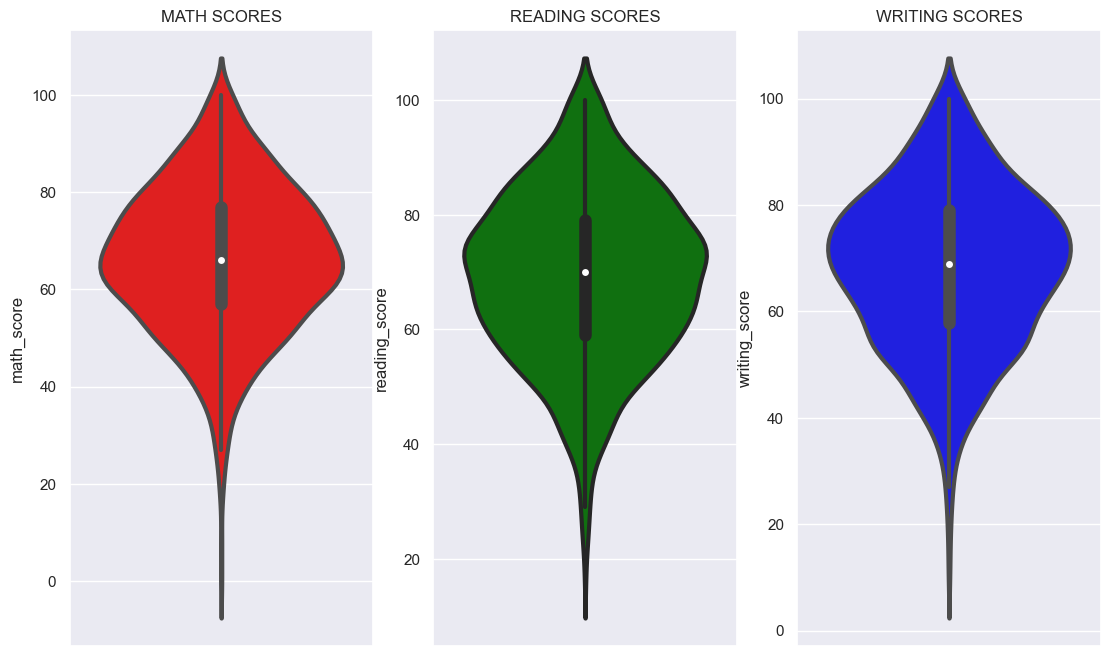

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sb.violinplot(y='math_score',data=studydata,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sb.violinplot(y='reading_score',data=studydata,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sb.violinplot(y='writing_score',data=studydata,color='blue',linewidth=3)
plt.show()

Violin plot of scores by subject based on parents education level

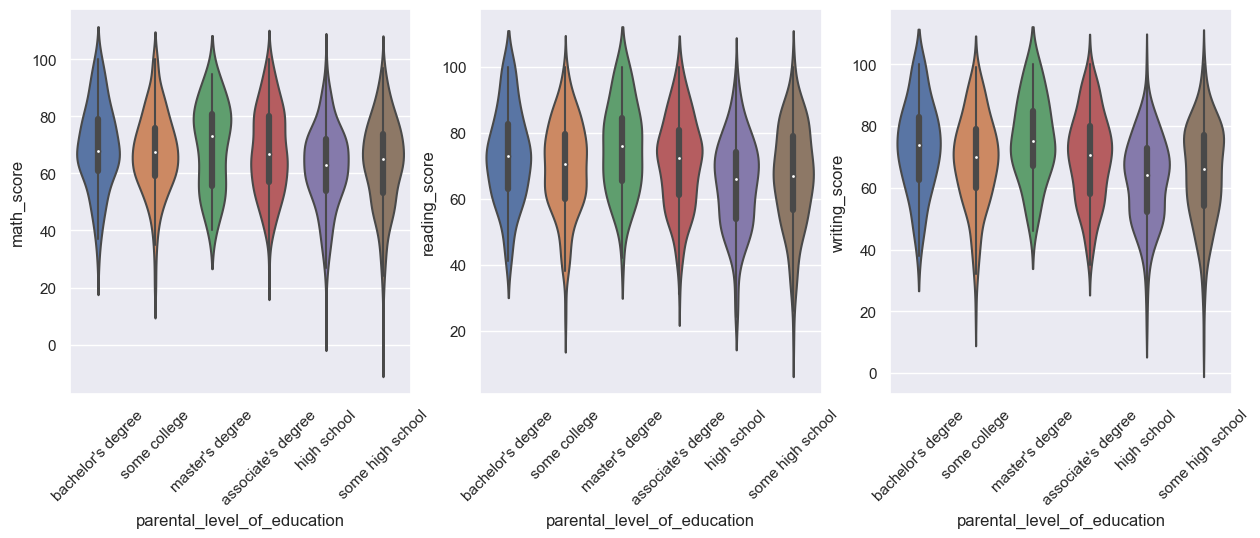

In [19]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sb.violinplot(x = 'parental_level_of_education', y='math_score', data=studydata)
plt.xticks(rotation = 45)

plt.subplot(1, 3, 2)
sb.violinplot(x = 'parental_level_of_education', y='reading_score', data=studydata)
plt.xticks(rotation = 45)

plt.subplot(1, 3, 3)
sb.violinplot(x = 'parental_level_of_education', y='writing_score', data=studydata)
plt.xticks(rotation = 45)

plt.show()

# Preparing the Dataset

In [20]:
studydata.isnull().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [21]:
studydata.duplicated().sum()


0

In [22]:
studydata['total_score'] = studydata['math_score'] + studydata['reading_score'] + studydata['writing_score']
studydata['mean_score'] = round(studydata['total_score'] / 3, 2)
studydata['median_score'] = studydata[['math_score', 'reading_score', 'writing_score']].median(axis=1)

studydata.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  mean_score  median_score  
0          218       72.67          72.0  
1          247       82.33          88.0  
2          278       92.67          93.0  
3          148       49.33          47.0  
4          229       76.33          76.0

More EDA based on the newly added columns ie: total_score, mean_score, median_score

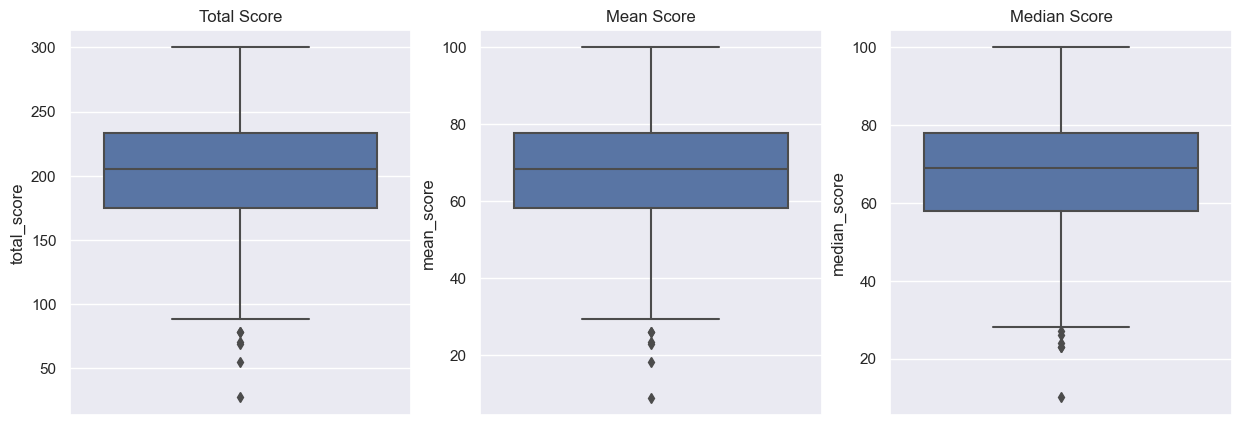

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sb.boxplot(data=studydata, y='total_score')
plt.title('Total Score')

plt.subplot(1, 3, 2)
sb.boxplot(data=studydata, y='mean_score')
plt.title('Mean Score')

plt.subplot(1, 3, 3)
sb.boxplot(data=studydata, y='median_score')
plt.title('Median Score')

plt.show()


Correlation Heatmap

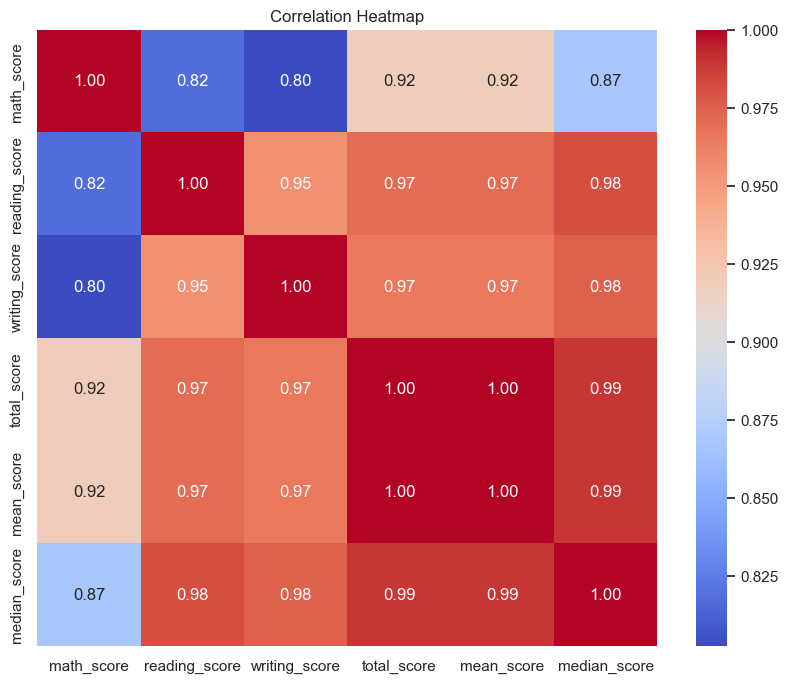

In [24]:
numeric_df = studydata.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Average score by Parent Level of education

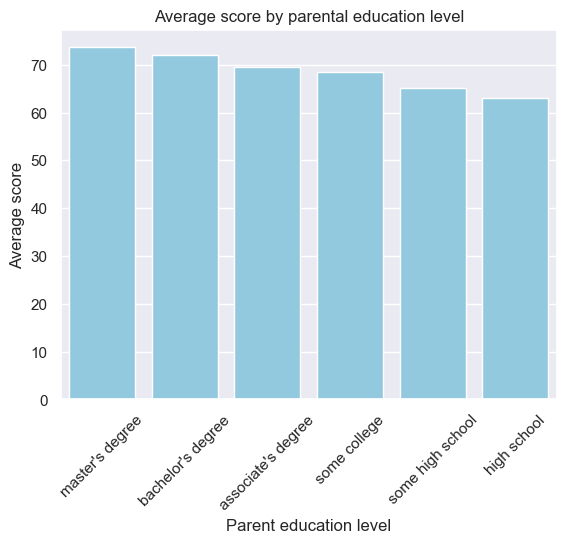

In [25]:
mean_scores = studydata.groupby('parental_level_of_education')['mean_score'].mean().round(2).sort_values(ascending=False)

sb.barplot(x=mean_scores.index, y=mean_scores.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Parent education level')
plt.ylabel('Average score')
plt.title('Average score by parental education level')
plt.show()


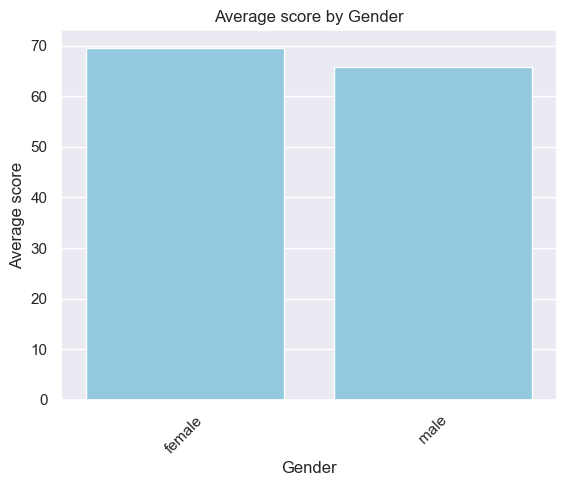

In [26]:
mean_scores = studydata.groupby('gender')['mean_score'].mean().round(2).sort_values(ascending=False)

sb.barplot(x=mean_scores.index, y=mean_scores.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Gender')
plt.ylabel('Average score')
plt.title('Average score by Gender')
plt.show()

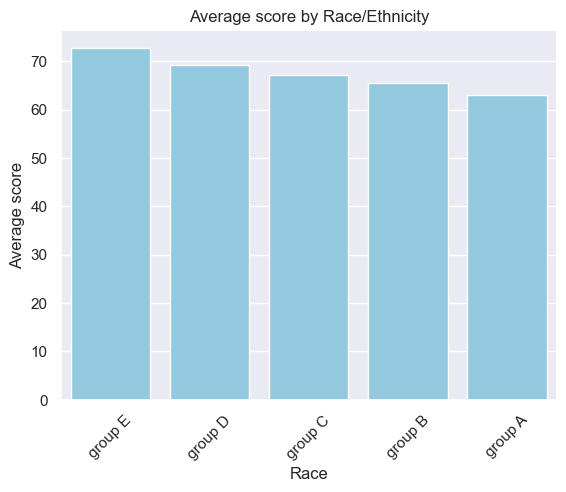

In [27]:
mean_scores = studydata.groupby('race_ethnicity')['mean_score'].mean().round(2).sort_values(ascending=False)

sb.barplot(x=mean_scores.index, y=mean_scores.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Race')
plt.ylabel('Average score')
plt.title('Average score by Race/Ethnicity')
plt.show()

<Axes: xlabel='mean_score', ylabel='Count'>

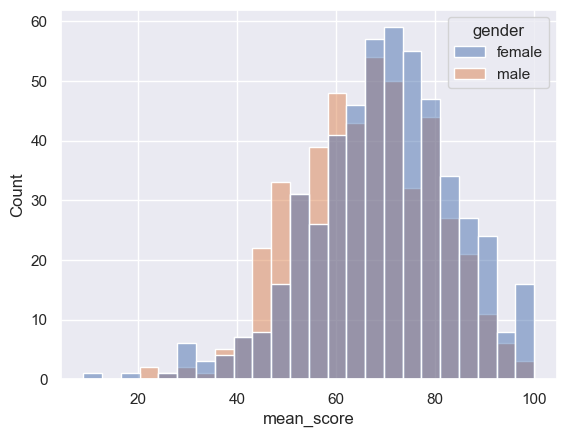

In [28]:
sb.histplot(data = studydata, x = 'mean_score', hue = 'gender')


C:\Users\lakho\AppData\Local\Temp\ipykernel_9520\1601263516.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\lakho\AppData\Local\Temp\ipykernel_9520\1601263516.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\lakho\AppData\Local\Temp\ipykernel_9520\1601263516.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


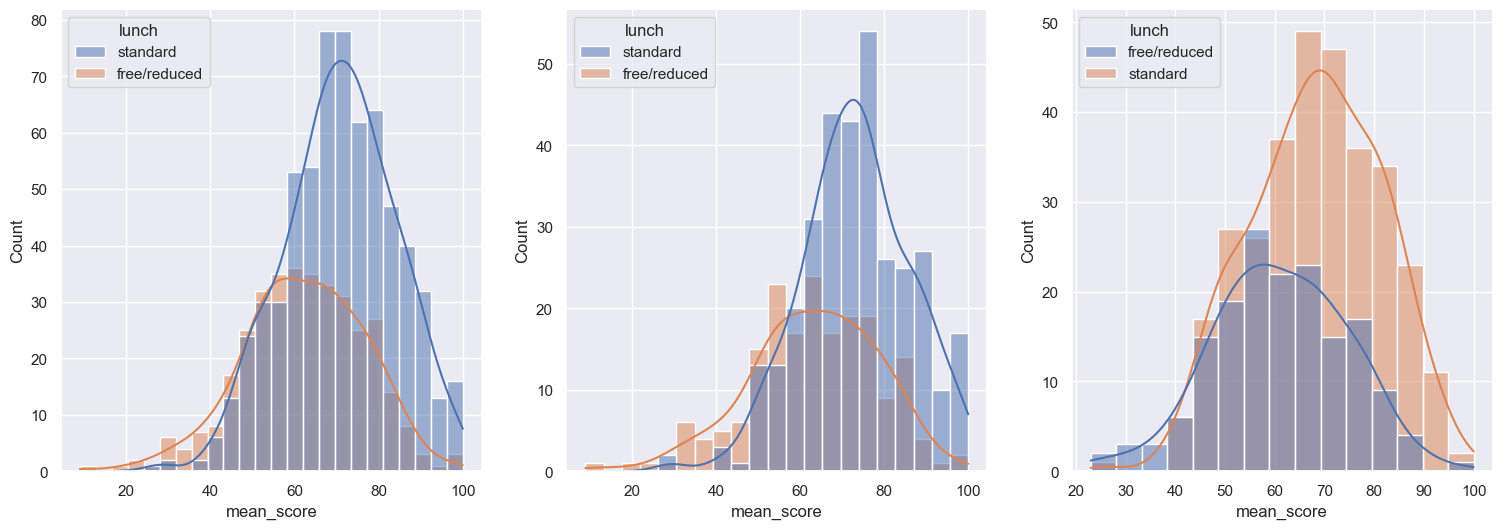

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sb.histplot(data=studydata,x='mean_score',kde=True,hue='lunch')
plt.subplot(142)
sb.histplot(data=studydata[studydata.gender=='female'],x='mean_score',kde=True,hue='lunch')
plt.subplot(143)
sb.histplot(data=studydata[studydata.gender=='male'],x='mean_score',kde=True,hue='lunch')
plt.show()

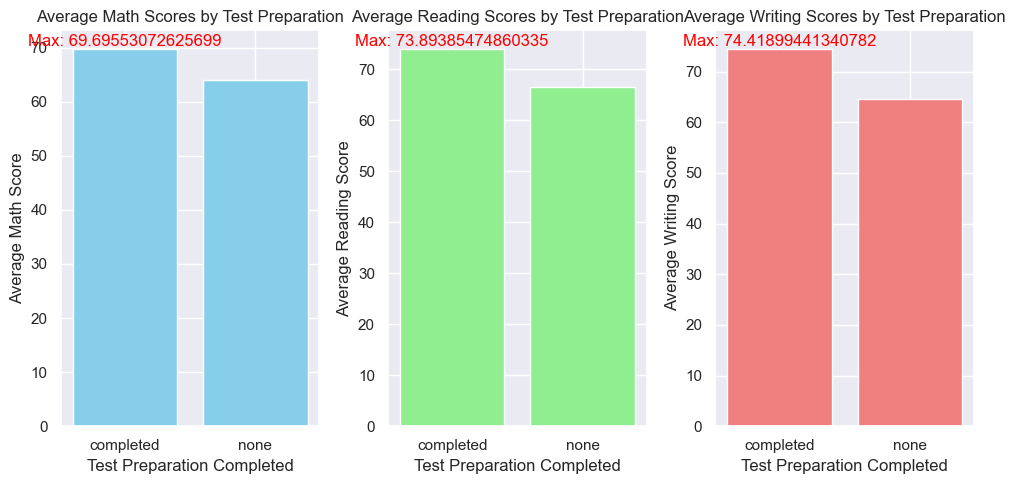

In [30]:
prep_scores = studydata[['math_score', 'reading_score', 'writing_score','test_preparation_course']].groupby('test_preparation_course').agg('mean')

# Plotting bar graphs
plt.figure(figsize=(10, 5))

# Math Scores
plt.subplot(1, 3, 1)
plt.bar(prep_scores.index, prep_scores['math_score'], color='skyblue')
max_math_score = prep_scores['math_score'].max()
plt.text(prep_scores.index[prep_scores['math_score'].argmax()], max_math_score, f'Max: {max_math_score}', ha='center', va='bottom', color='red')
plt.title('Average Math Scores by Test Preparation')
plt.xlabel('Test Preparation Completed')
plt.ylabel('Average Math Score')

# Reading Scores
plt.subplot(1, 3, 2)
plt.bar(prep_scores.index, prep_scores['reading_score'], color='lightgreen')
max_reading_score = prep_scores['reading_score'].max()
plt.text(prep_scores.index[prep_scores['reading_score'].argmax()], max_reading_score, f'Max: {max_reading_score}', ha='center', va='bottom', color='red')
plt.title('Average Reading Scores by Test Preparation')
plt.xlabel('Test Preparation Completed')
plt.ylabel('Average Reading Score')

# Writing Scores
plt.subplot(1, 3, 3)
plt.bar(prep_scores.index, prep_scores['writing_score'], color='lightcoral')
max_writing_score = prep_scores['writing_score'].max()
plt.text(prep_scores.index[prep_scores['writing_score'].argmax()], max_writing_score, f'Max: {max_writing_score}', ha='center', va='bottom', color='red')
plt.title('Average Writing Scores by Test Preparation')
plt.xlabel('Test Preparation Completed')
plt.ylabel('Average Writing Score')

plt.tight_layout()
plt.show()

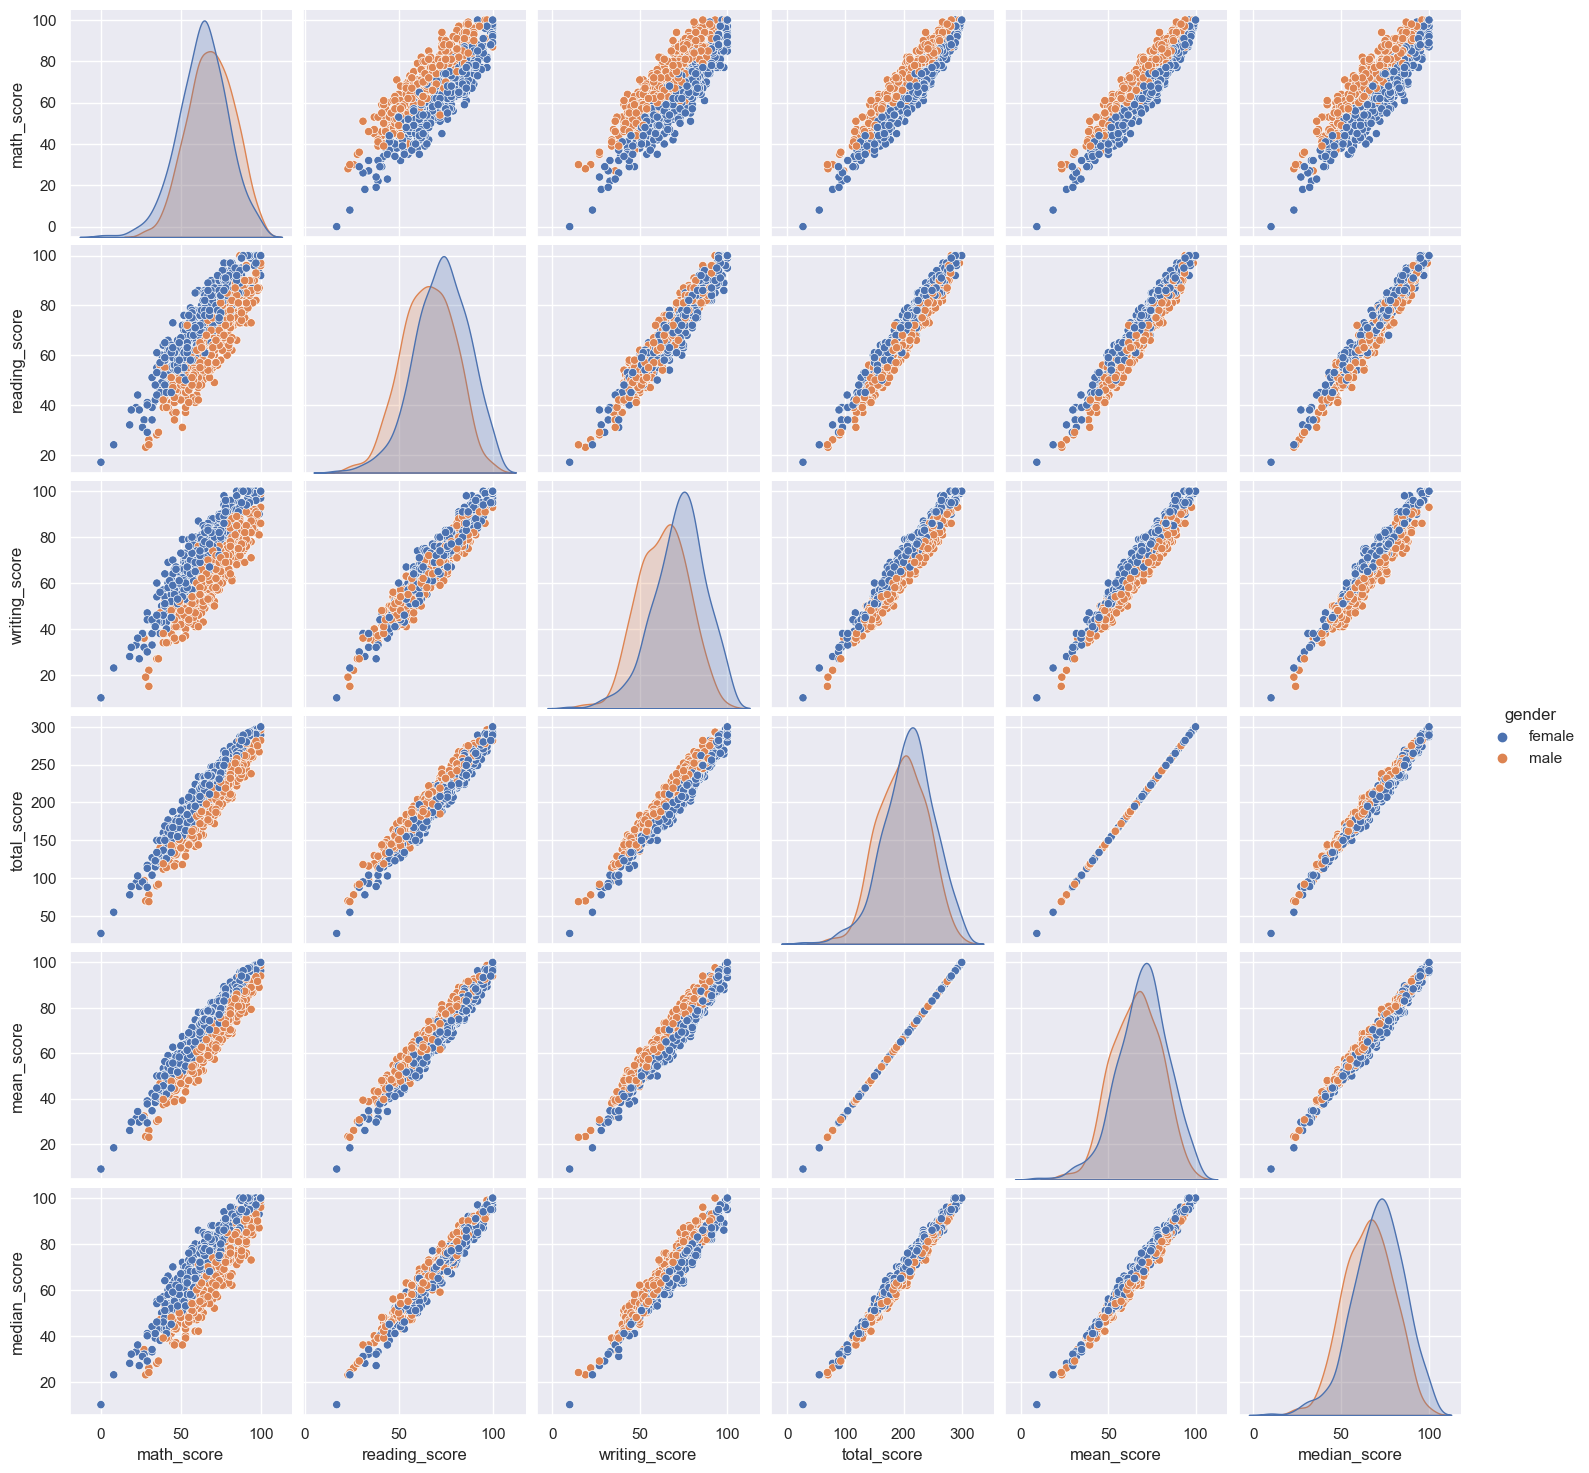

In [31]:
sb.pairplot(studydata,hue = 'gender')
plt.show()

C:\Users\lakho\AppData\Local\Temp\ipykernel_9520\3455874187.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\lakho\AppData\Local\Temp\ipykernel_9520\3455874187.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\lakho\AppData\Local\Temp\ipykernel_9520\3455874187.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


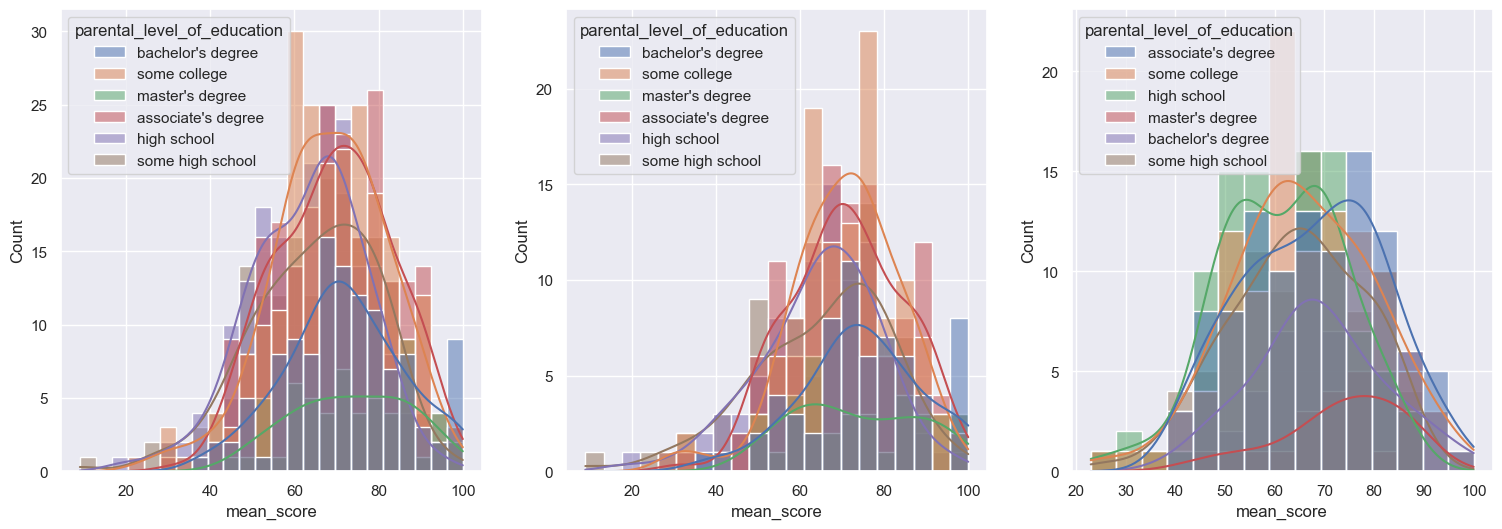

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sb.histplot(data=studydata,x='mean_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sb.histplot(data=studydata[studydata.gender=='female'],x='mean_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sb.histplot(data=studydata[studydata.gender=='male'],x='mean_score',kde=True,hue='parental_level_of_education')
plt.show()

# Multi Variate Linear Regression

In [33]:
print("Data type : ", type(studydata))
print("Data dims : ", studydata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1000, 11)


Response variable: total_score
Predictor Feature: reading_score, writing_score, math_score


In [34]:
# Extract Response and Predictors
y = pd.DataFrame(studydata["total_score"])
X = pd.DataFrame(studydata[["math_score", "reading_score", "writing_score"]])

In [35]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (750, 1) (750, 3)
Test Set  : (250, 1) (250, 3)


In [36]:
# Summary Statistics for Response
y_train.describe()

total_score
count   750.000000
mean    203.362667
std      42.299324
min      55.000000
25%     175.000000
50%     205.000000
75%     232.000000
max     300.000000

In [37]:
# Summary Statistics for Predictors
X_train.describe()

math_score  reading_score  writing_score
count  750.000000     750.000000     750.000000
mean    66.116000      69.133333      68.113333
std     14.937293      14.505681      15.060774
min      8.000000      23.000000      15.000000
25%     57.000000      59.000000      58.000000
50%     66.000000      70.000000      69.000000
75%     76.000000      80.000000      79.000000
max    100.000000     100.000000     100.000000

<Axes: >

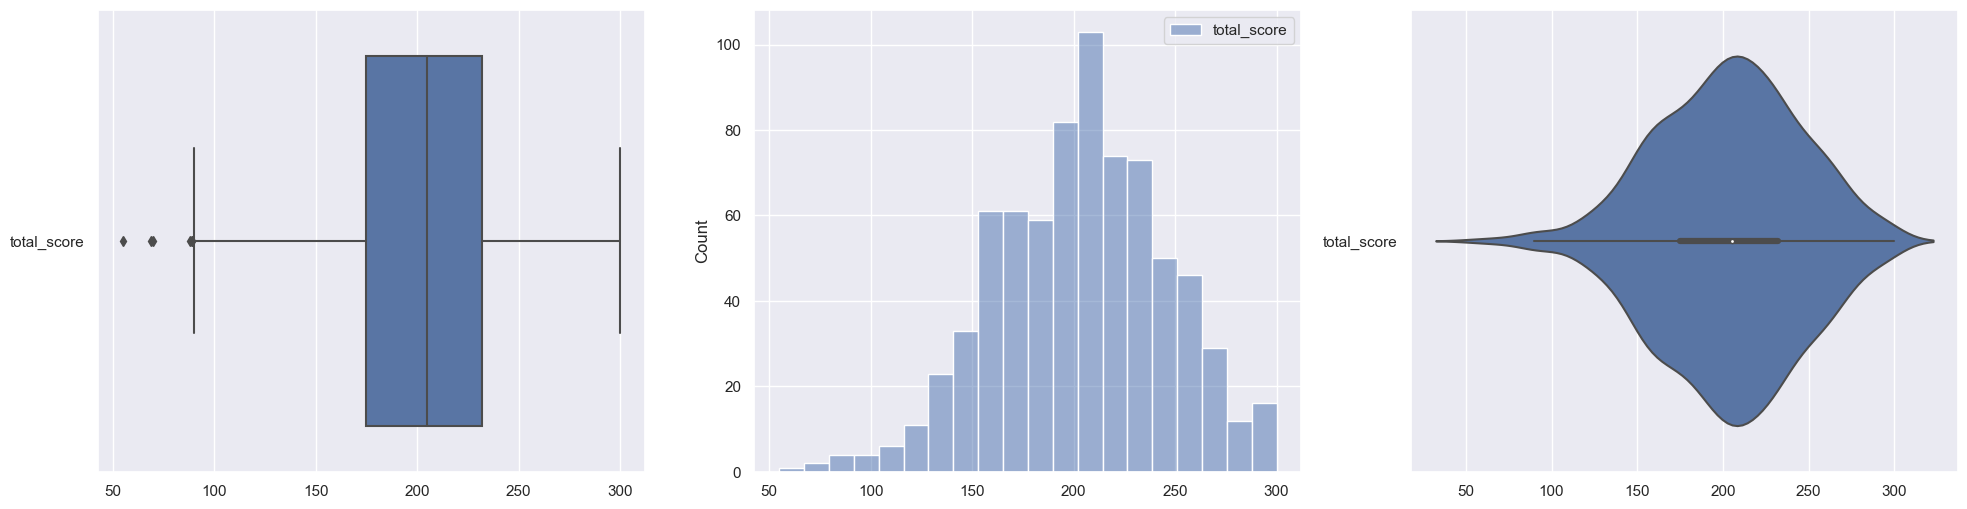

In [38]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y_train, orient = "h", ax = axes[0])
sb.histplot(data = y_train, ax = axes[1])
sb.violinplot(data = y_train, orient = "h", ax = axes[2])

<Axes: >

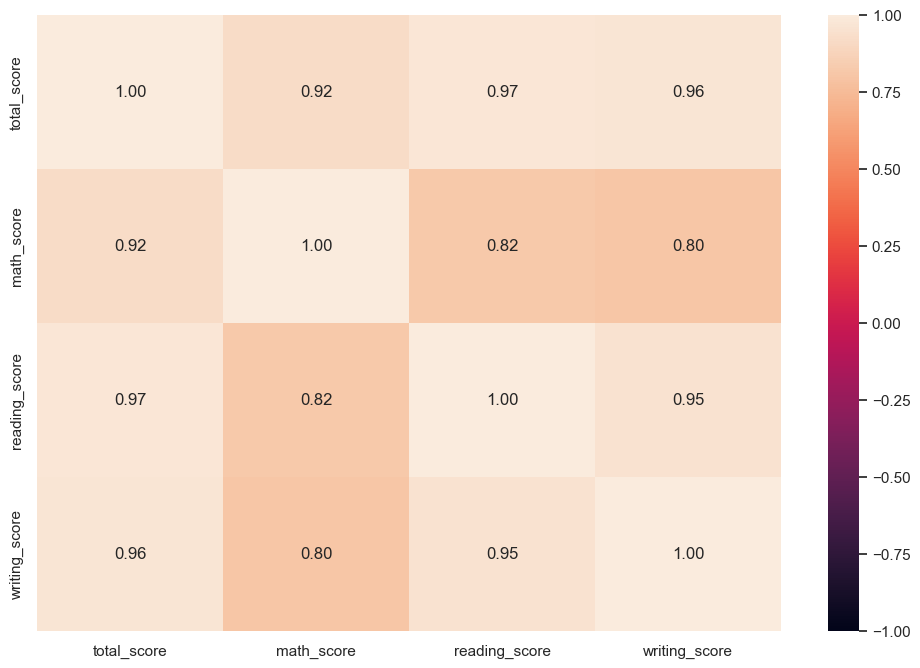

In [39]:
# Correlation between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f = plt.figure(figsize=(12, 8))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

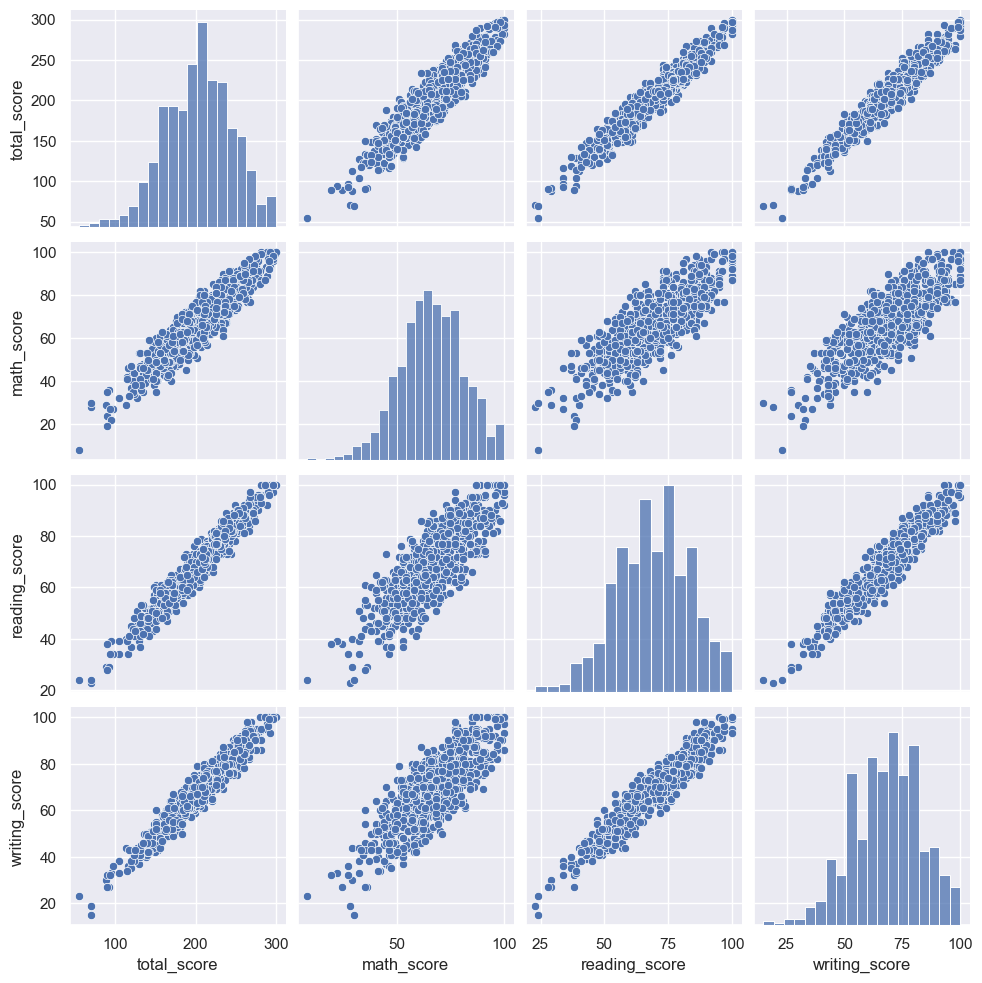

In [40]:
# Relationship between Response and the Predictors
sb.pairplot(data = trainDF)

In [41]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [0.]
Coefficients of Regression 	: a =  [[1. 1. 1.]]



Predictors  Coefficients
0     math_score           1.0
1  reading_score           1.0
2  writing_score           1.0

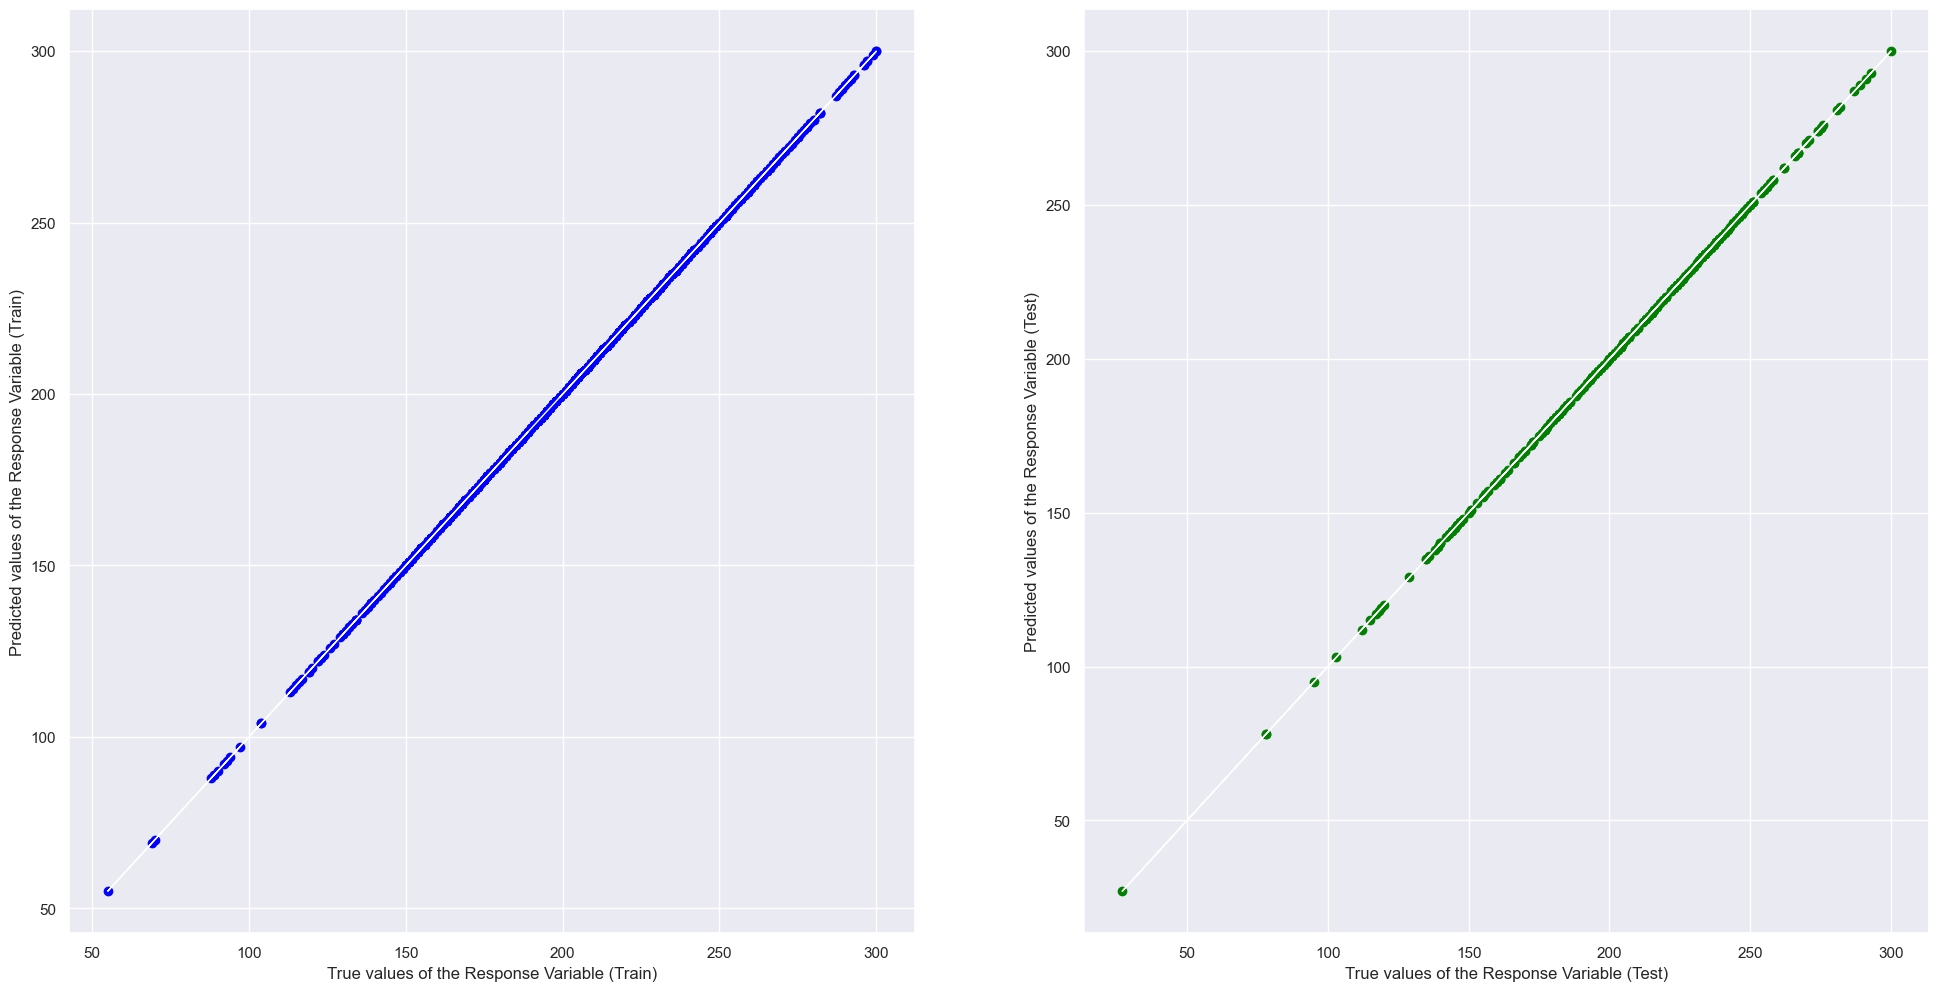

In [42]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [43]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 8.56261180963095e-29

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.1066771867164531e-28



Intercept of Regression 	: b =  [-8.52651283e-14]
Coefficients of Regression 	: a =  [[1. 1. 1.]]

      Predictors  Coefficients
0     math_score           1.0
1  reading_score           1.0
2  writing_score           1.0



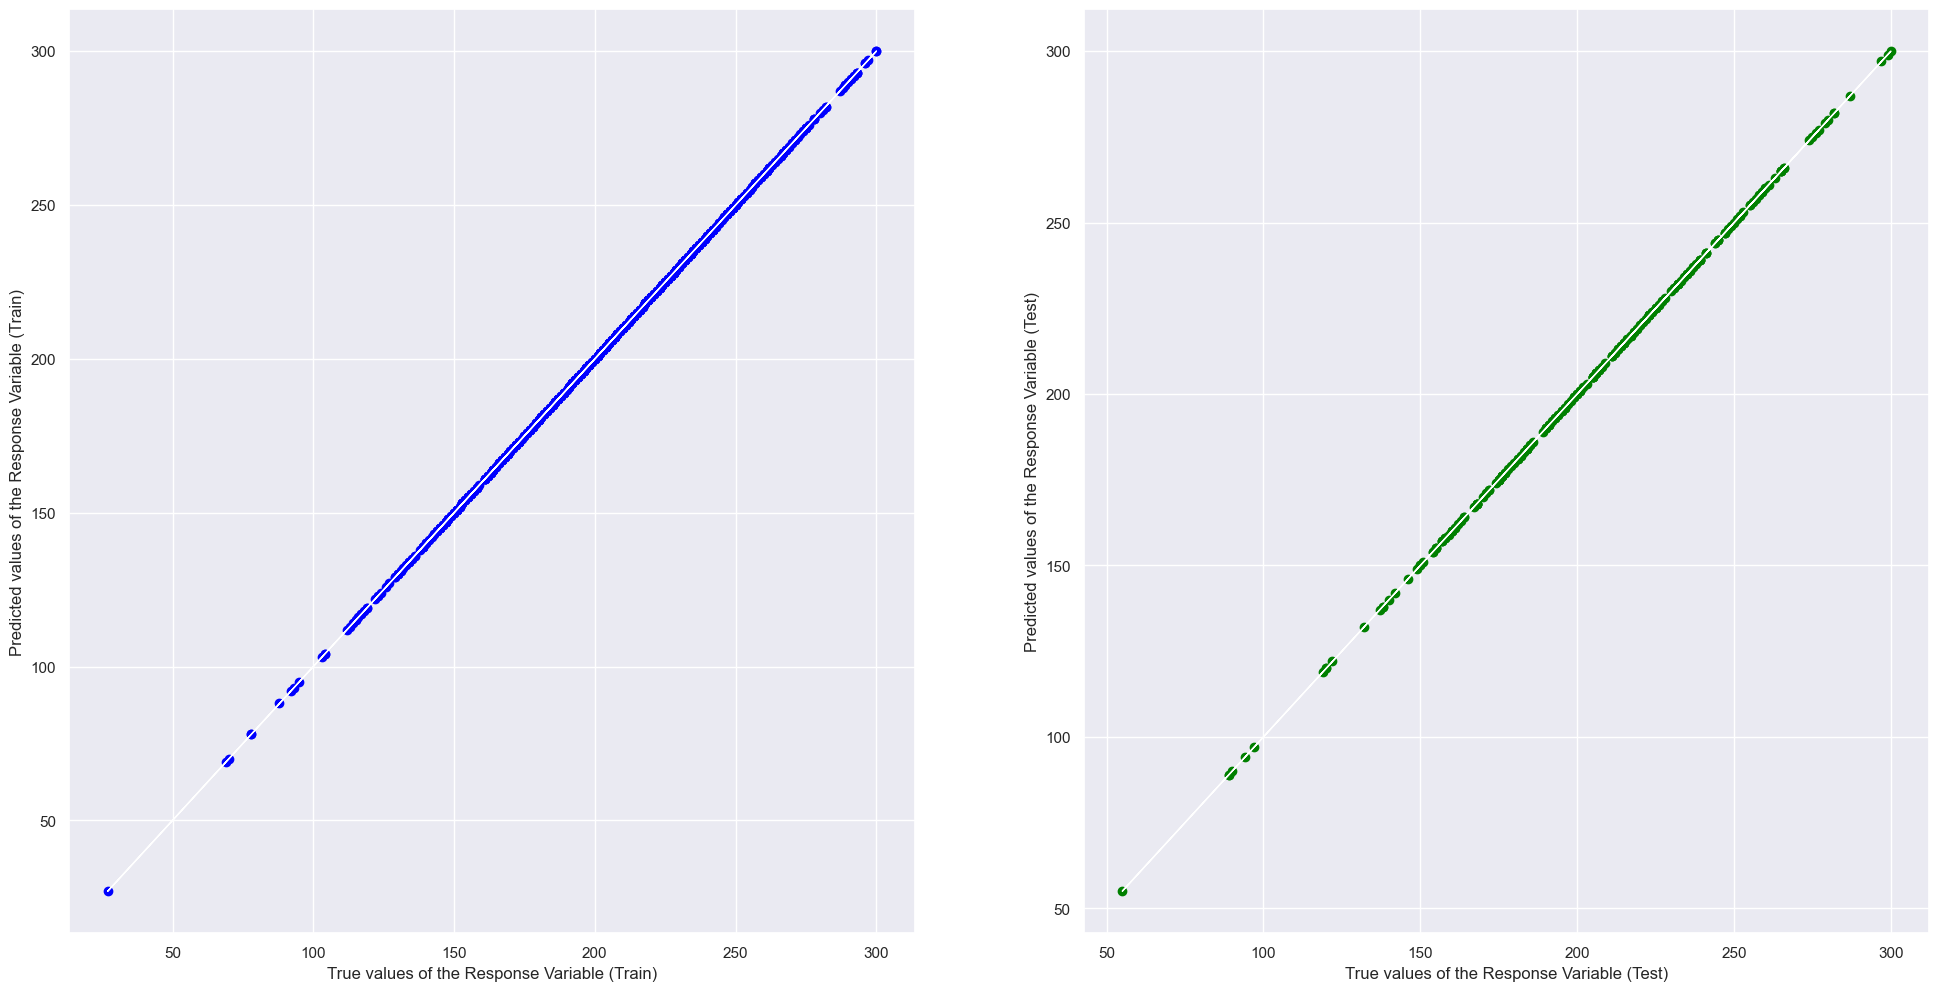

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 4.052599351173799e-28

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 3.917798799689633e-28



In [44]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
predictors = ["math_score", "reading_score", "writing_score"]

y = pd.DataFrame(studydata["total_score"])
X = pd.DataFrame(studydata[predictors])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train.to_numpy(), y_train.to_numpy(), 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test.to_numpy(), y_test.to_numpy(), 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Label Encoding

R-squared: 0.016869192414713297
Mean Squared Error: 1979.565010926866


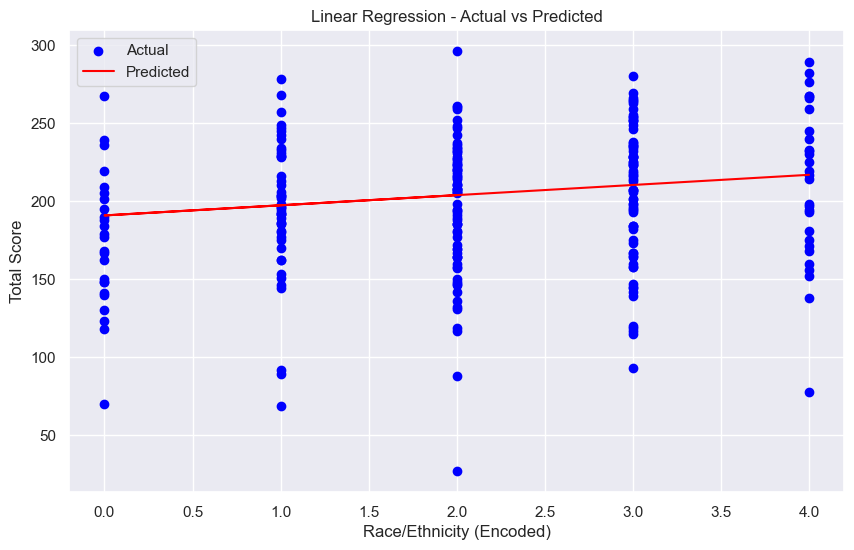

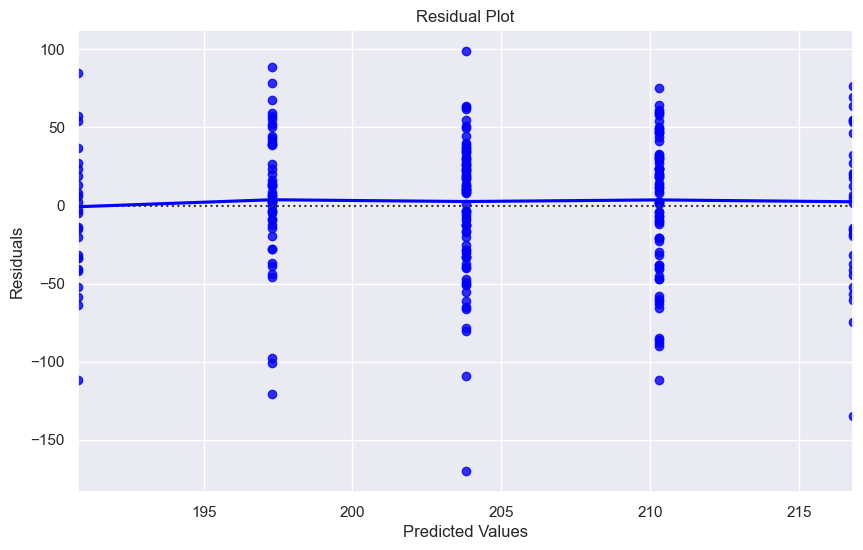

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
label_encoder = LabelEncoder()
studydata['race_ethnicity_encoded'] = label_encoder.fit_transform(studydata['race_ethnicity'])

# Define predictor (X) and response variable (y)
X = studydata[['race_ethnicity_encoded']]  # Predictor variable
y = studydata['total_score']  # Response variable

# Split the dataset into training and test sets (75% training, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

# Plot regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Linear Regression - Actual vs Predicted')
plt.xlabel('Race/Ethnicity (Encoded)')
plt.ylabel('Total Score')
plt.legend()
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sb.residplot(x=y_pred, y=residuals, lowess=True, color='blue')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


## Multi-Class Classification Tree

Response Variable : **race_ethnicity**     
Predictor Feature : **reading_score, writing_score, math_score, total_score**       

In [46]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["reading_score", "writing_score", "math_score", "total_score"]

y = pd.DataFrame(studydata['race_ethnicity'].astype('category'))
X = pd.DataFrame(studydata[predictors]) 

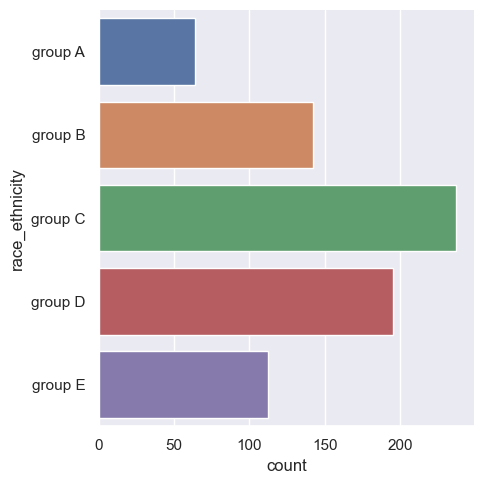

In [47]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "race_ethnicity", data = y_train, kind = "count")

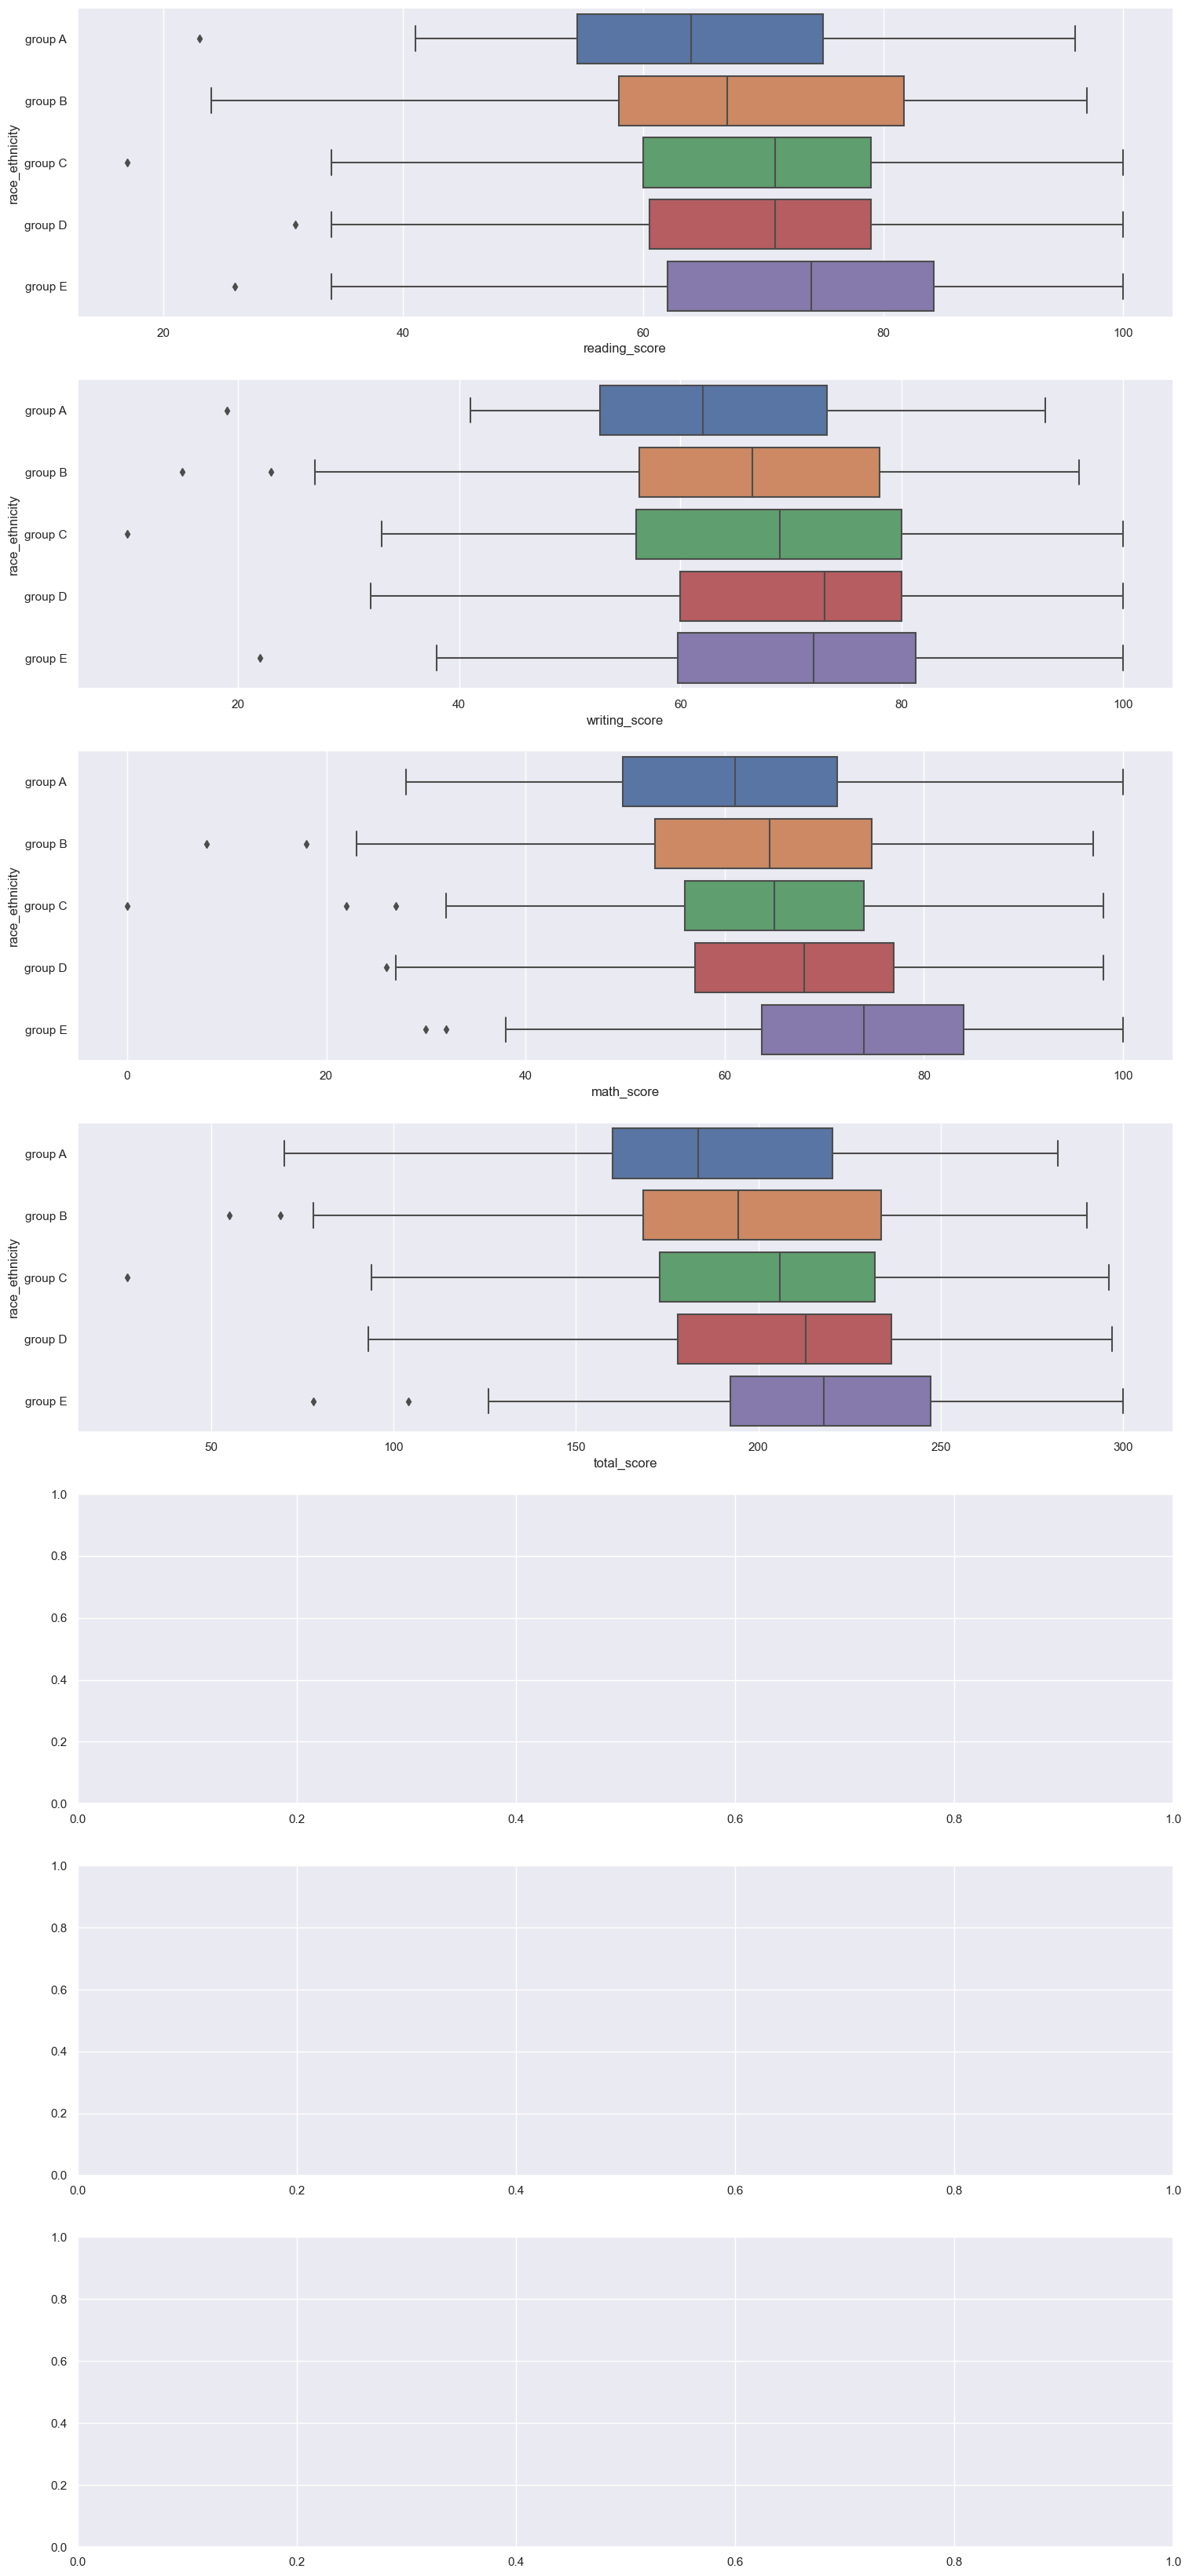

In [48]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "race_ethnicity", data = trainDF, orient = "h", ax = axes[count])
    count += 1

In [49]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.3626666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.328



<Axes: >

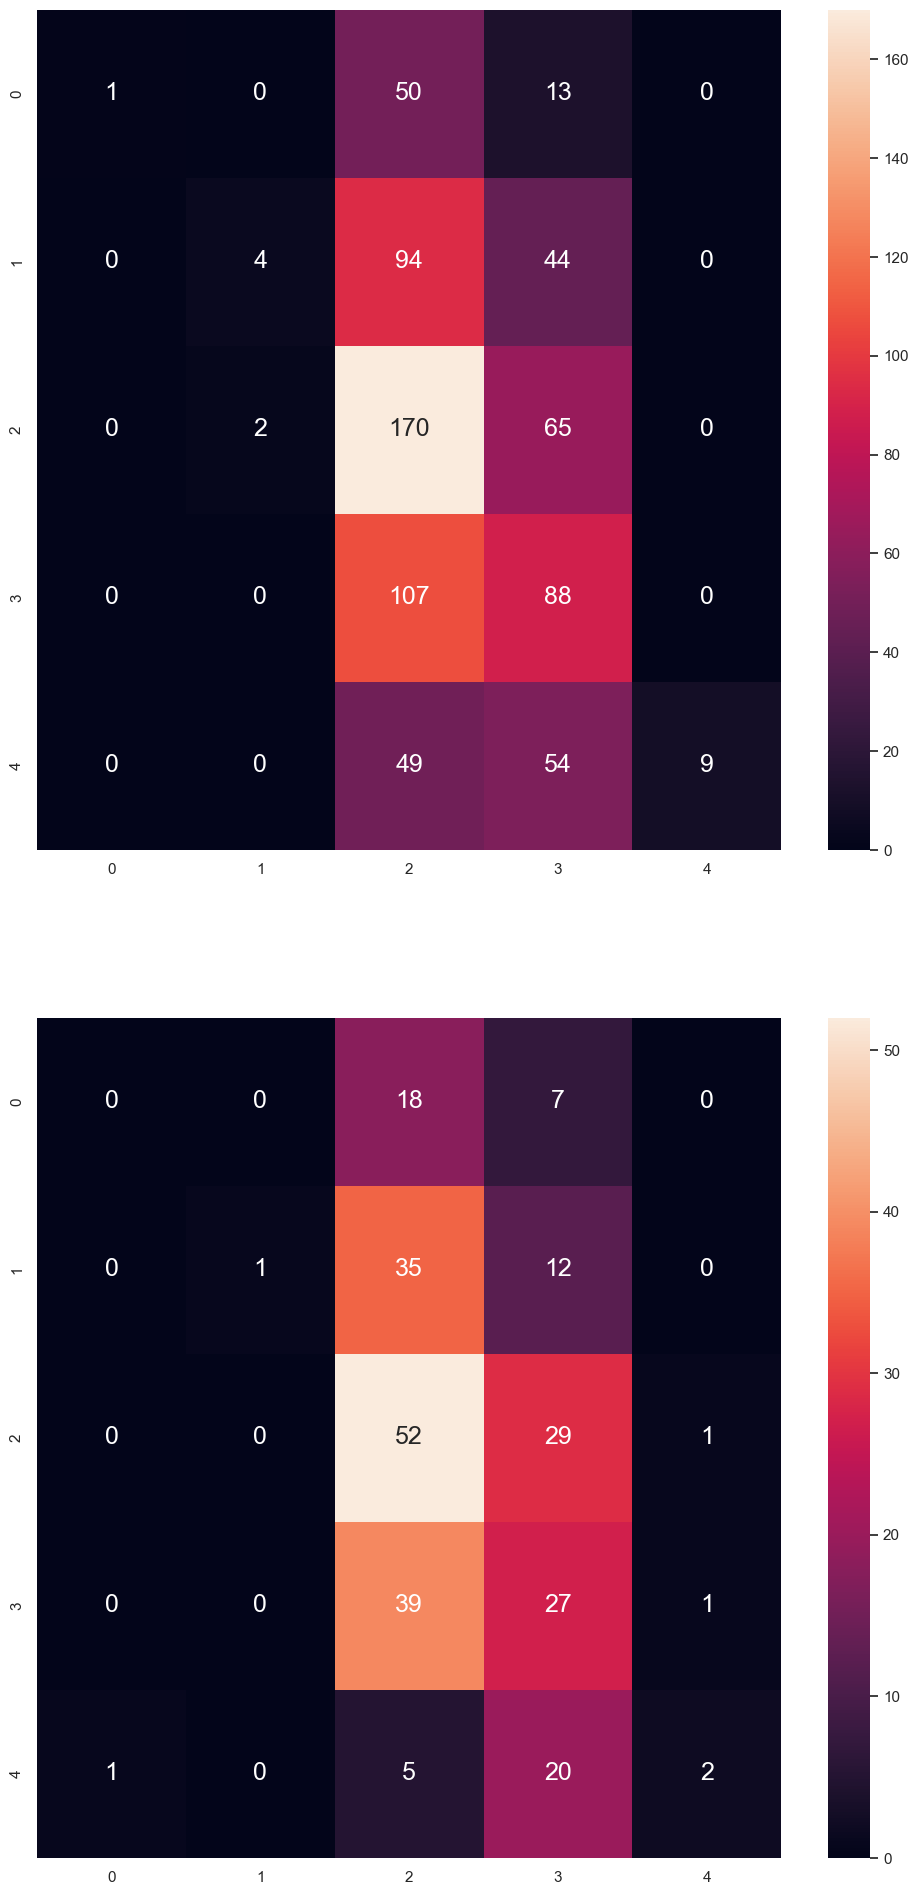

In [50]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

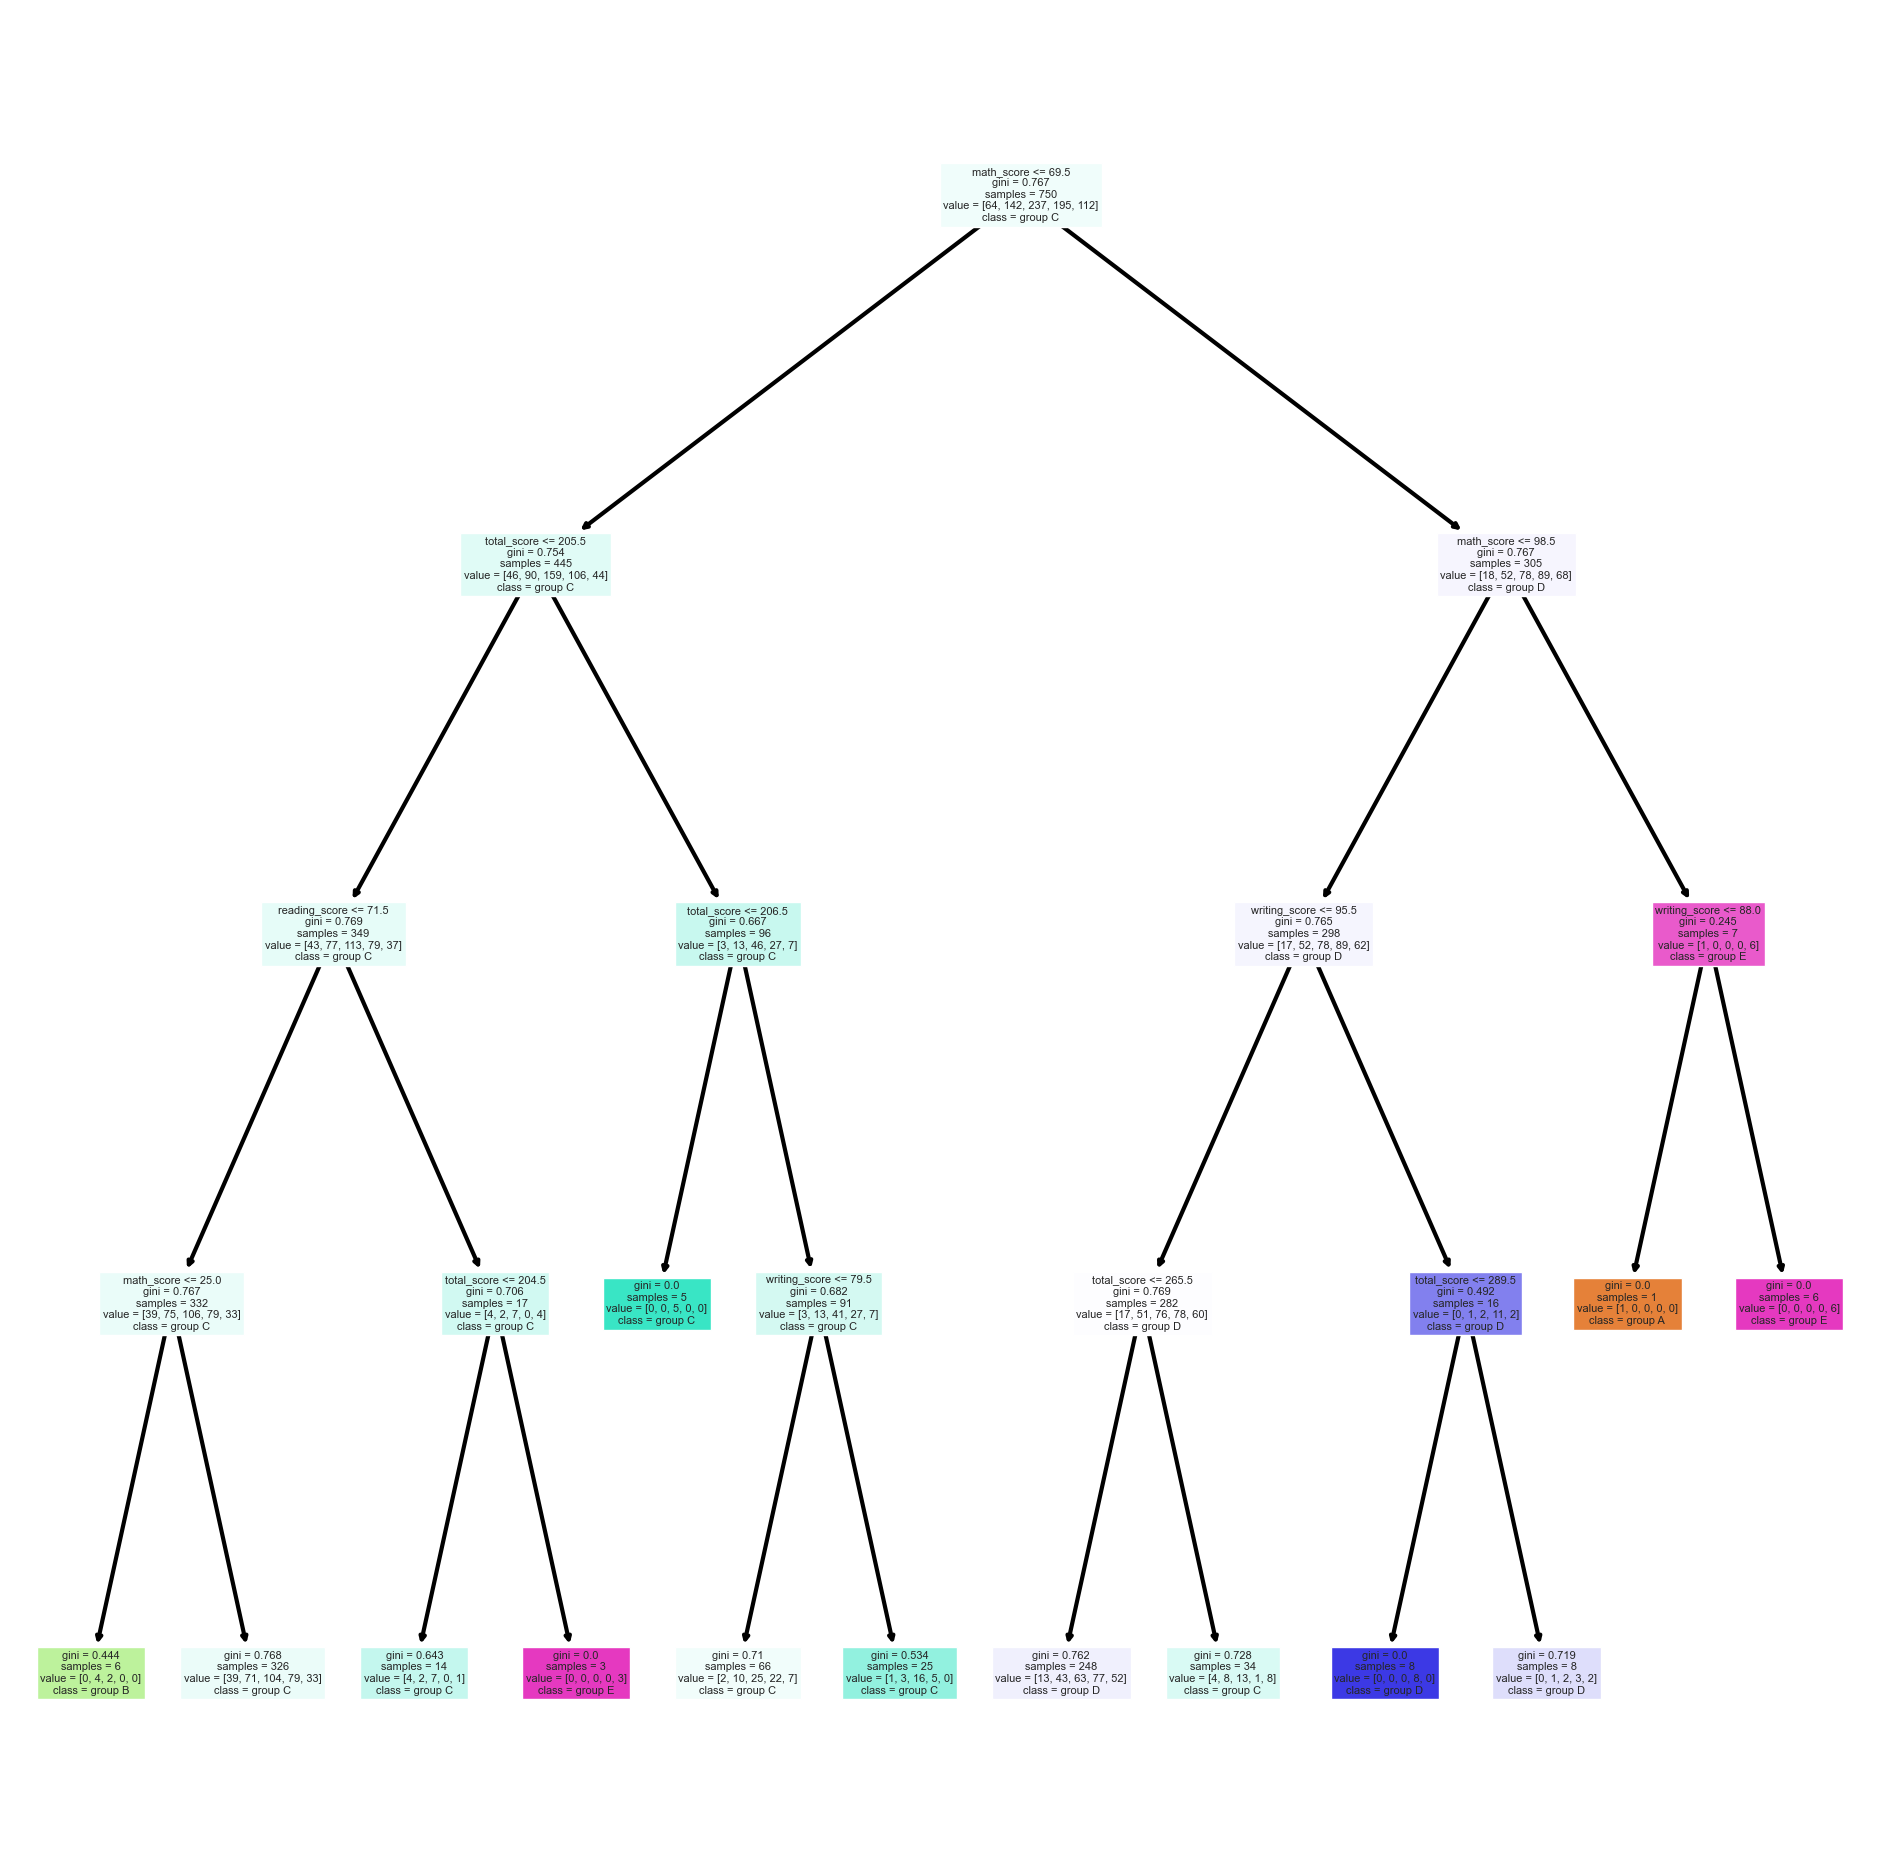

In [51]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 24))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Response Variable : **parental_level_of_education**     
Predictor Feature : **reading_score, writing_score, math_score, total_score**       

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.304

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.24



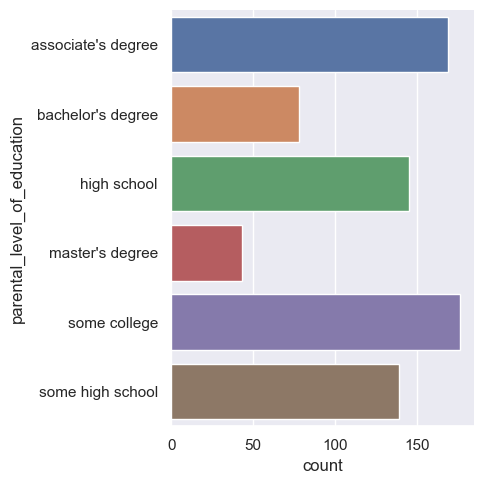

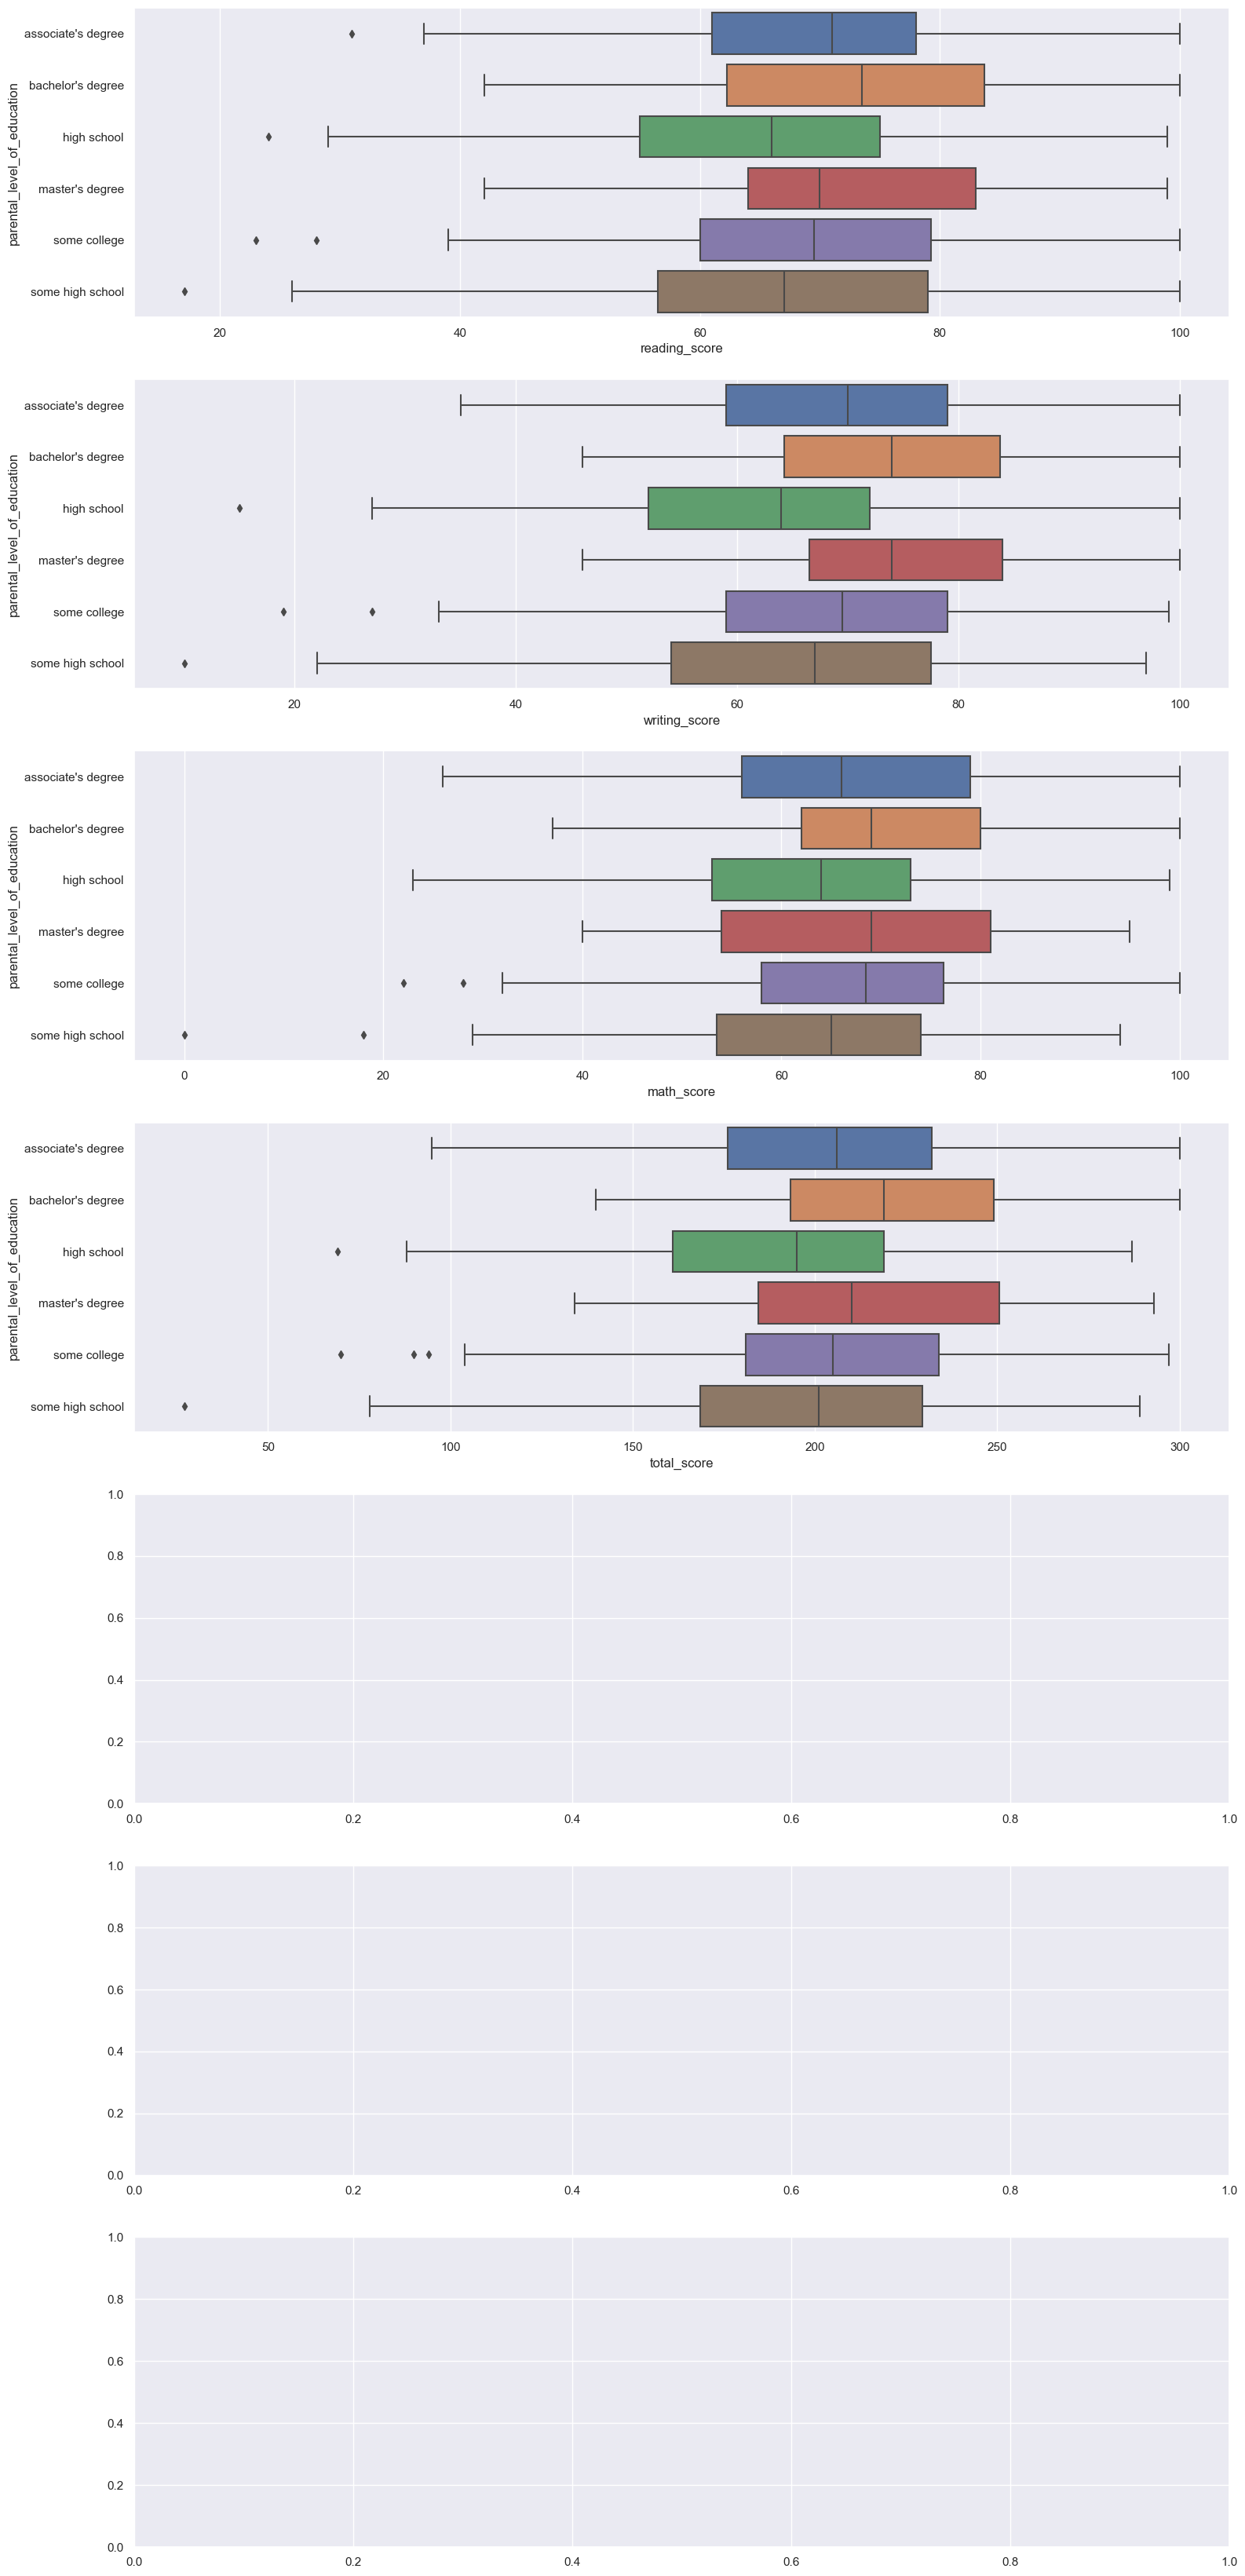

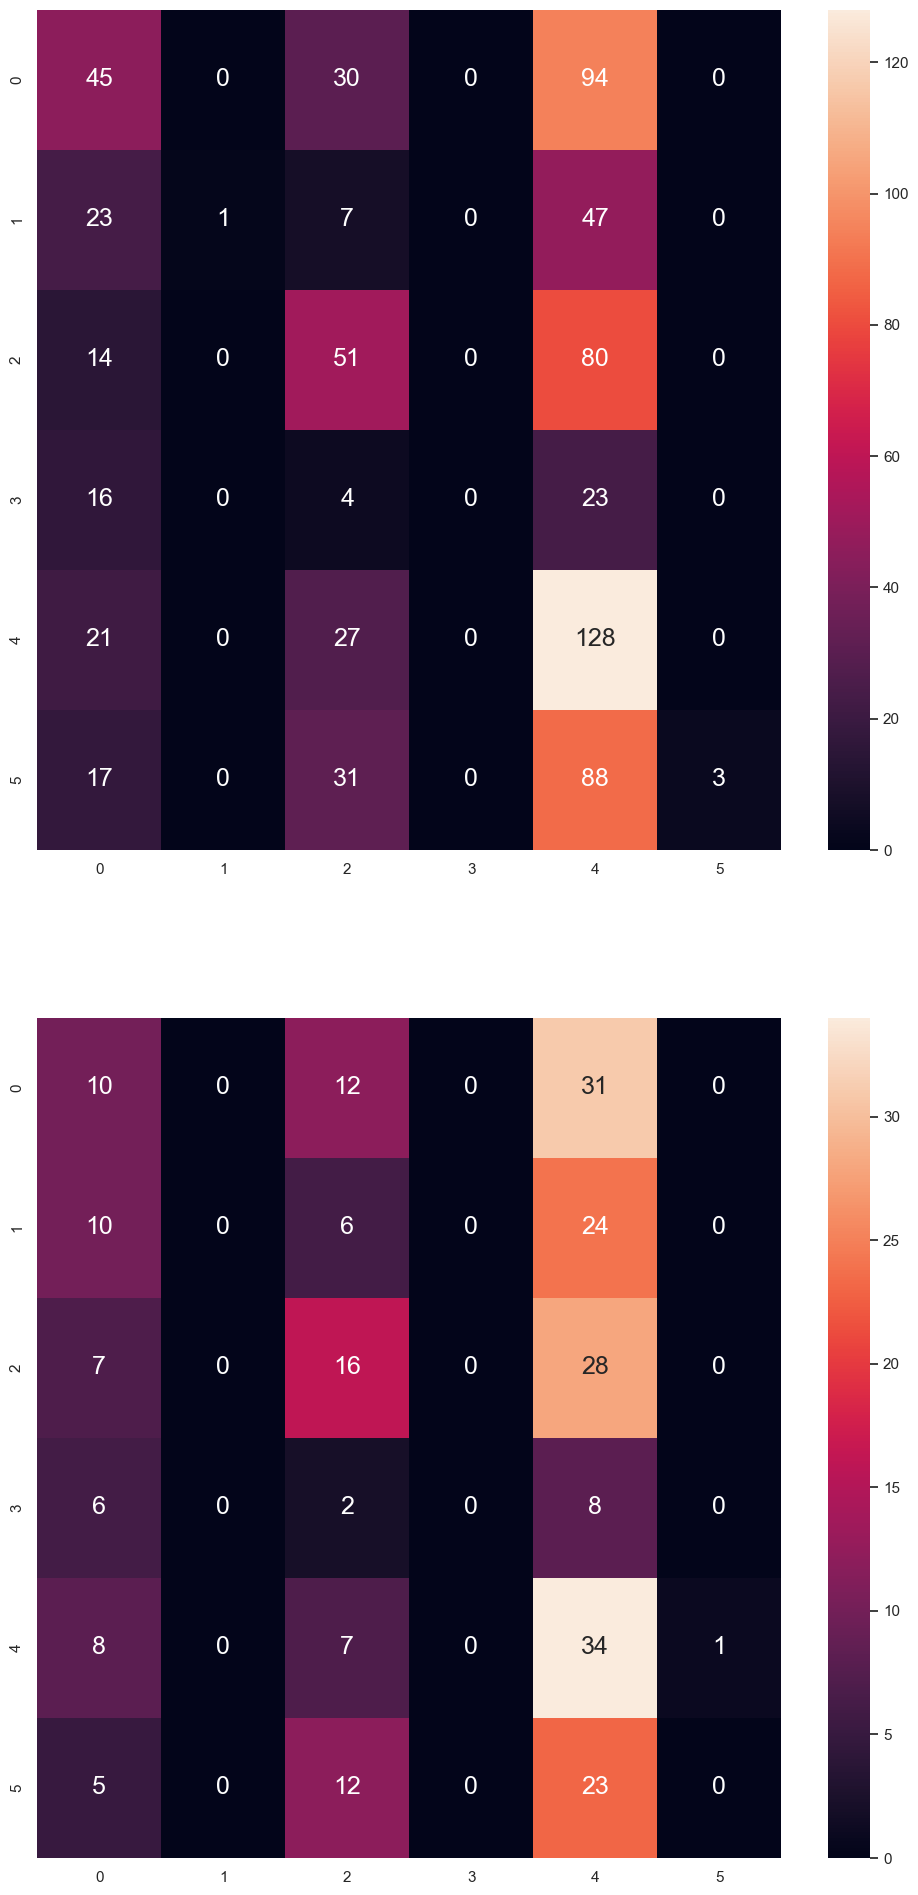

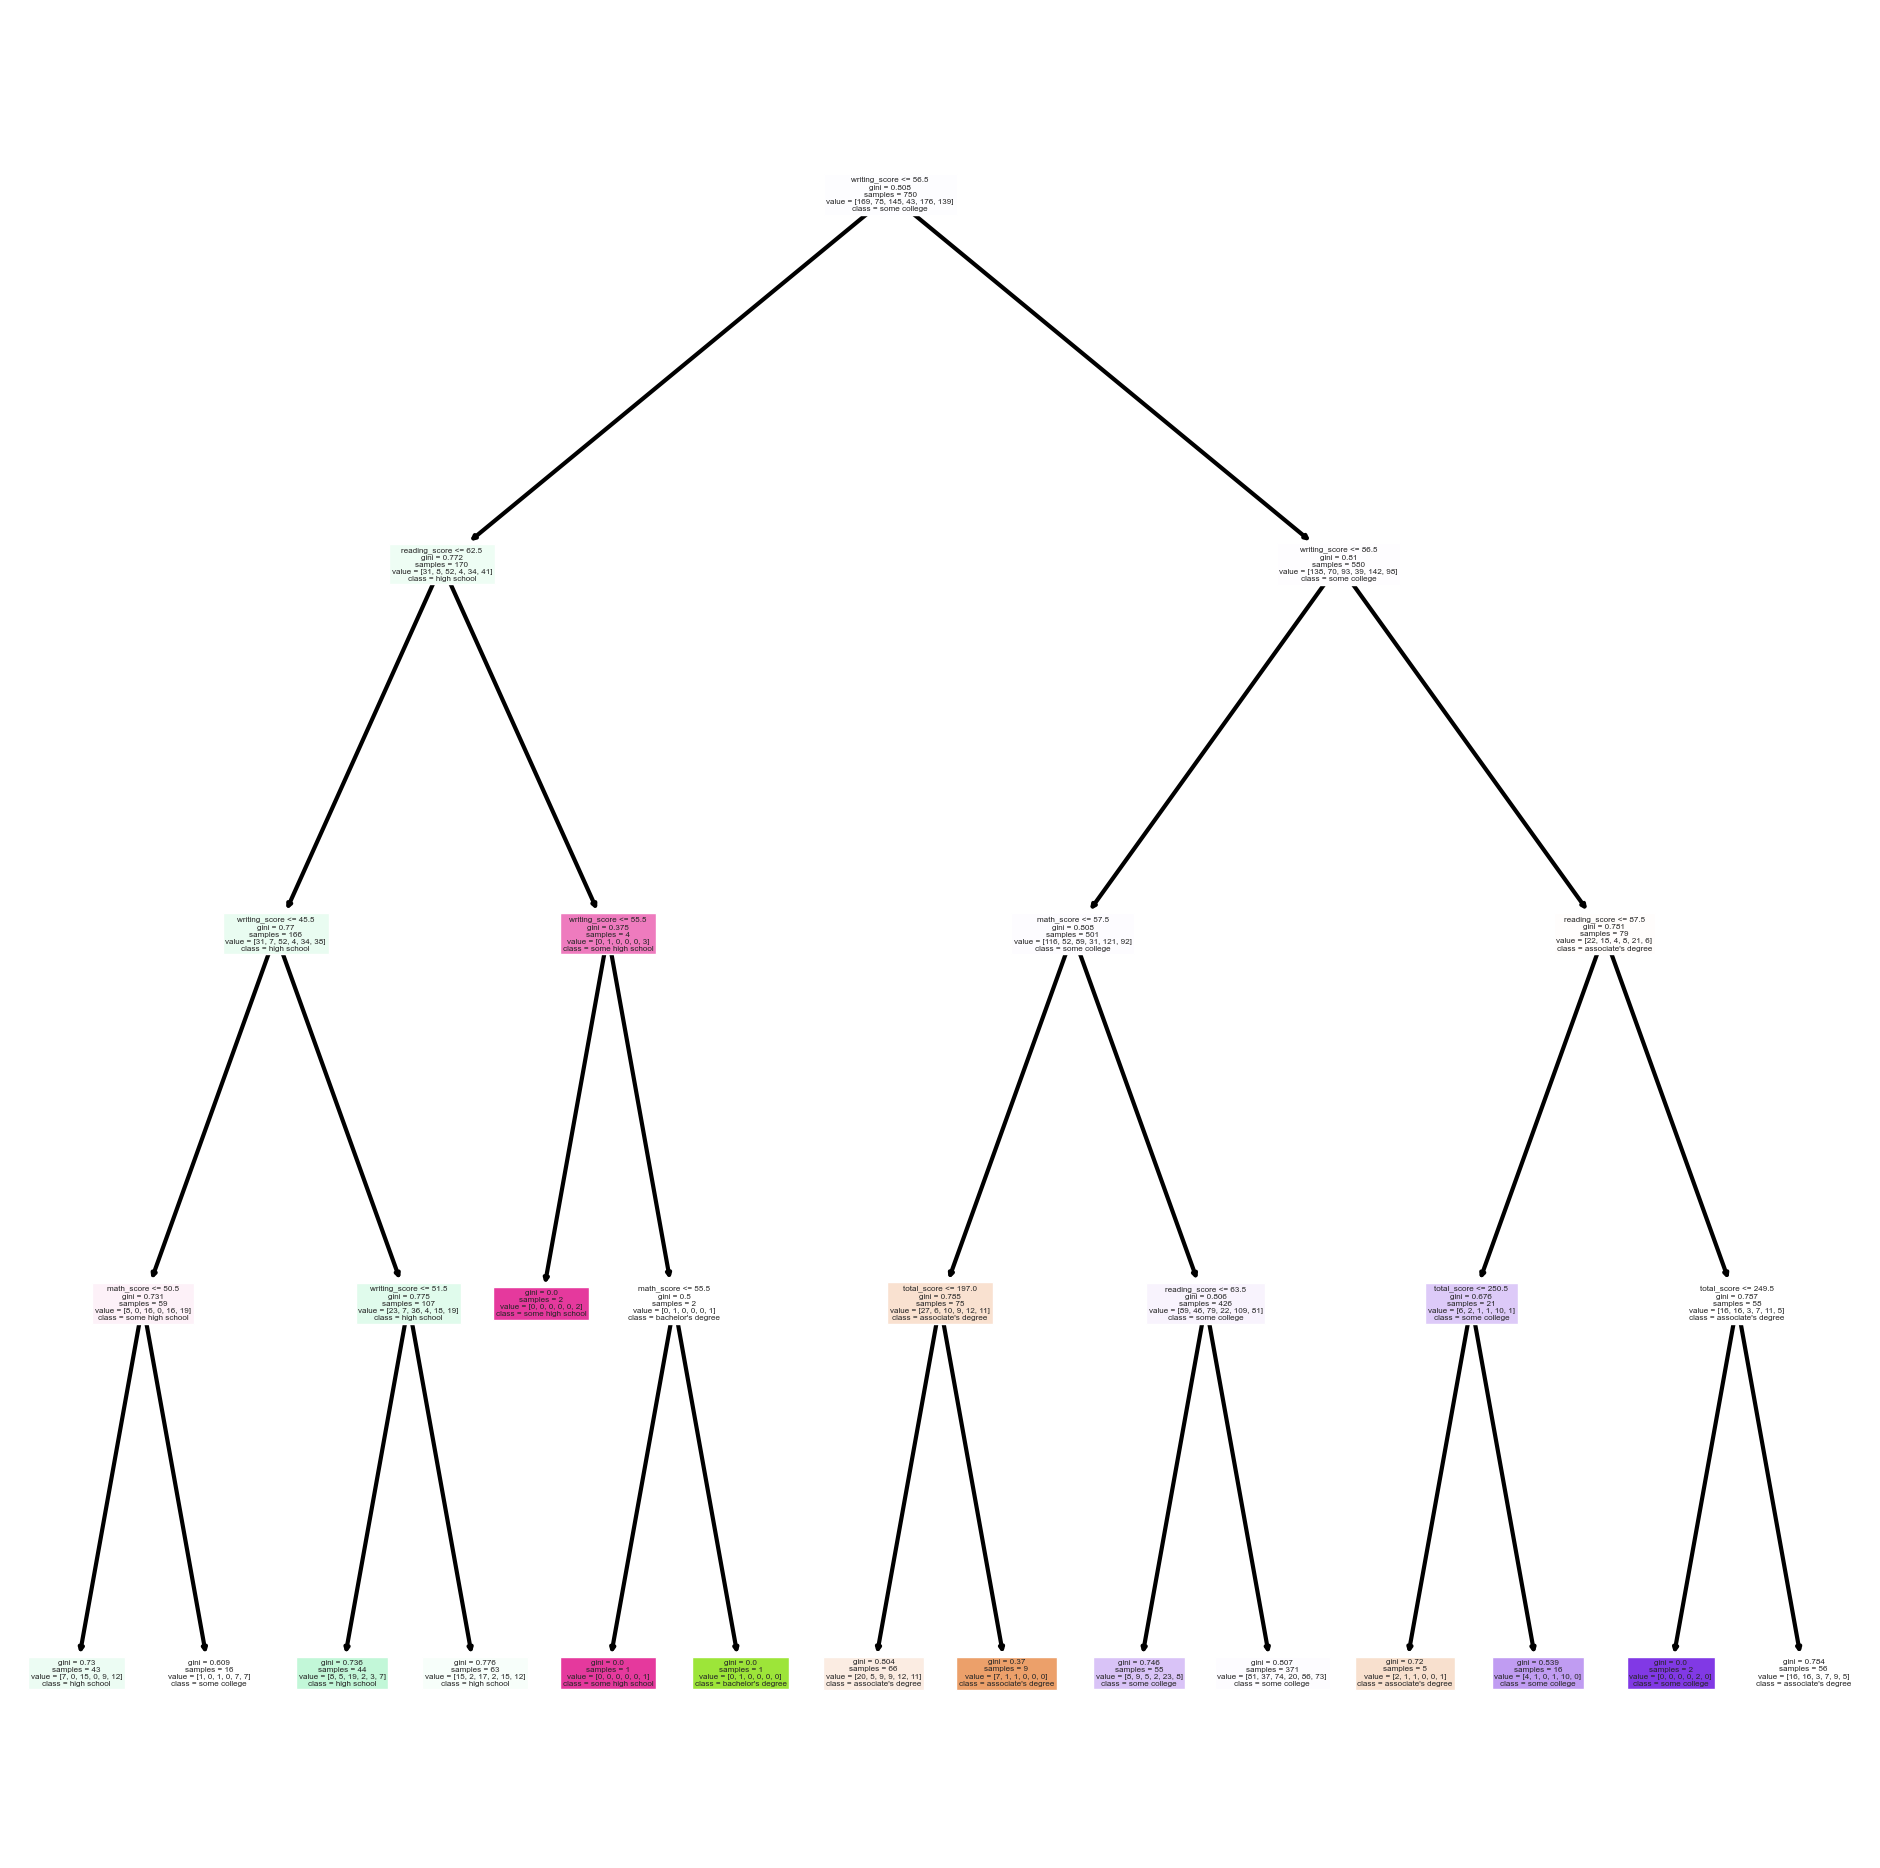

In [52]:
predictors = ["reading_score", "writing_score", "math_score", "total_score"]

y = pd.DataFrame(studydata['parental_level_of_education'].astype('category'))
X = pd.DataFrame(studydata[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Draw the distribution of Response
sb.catplot(y = "parental_level_of_education", data = y_train, kind = "count")

# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(7, 1, figsize=(18, 42))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "parental_level_of_education", data = trainDF, orient = "h", ax = axes[count])
    count += 1
    
    
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(2, 1, figsize=(12, 24))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 24))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Response Variable : lunchbool
Predictor Feature : reading_score, writing_score, math_score, total_score

In [53]:
studydata['lunchbool'] = studydata['lunch'].replace({'standard': True, 'free/reduced': False})

# Verify the changes
print(studydata.head())


   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  mean_score  median_score  race_ethnicity_encoded  lunchbool  
0          218       72.67          72.0                       1       Tru

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6986666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.676



<Axes: >

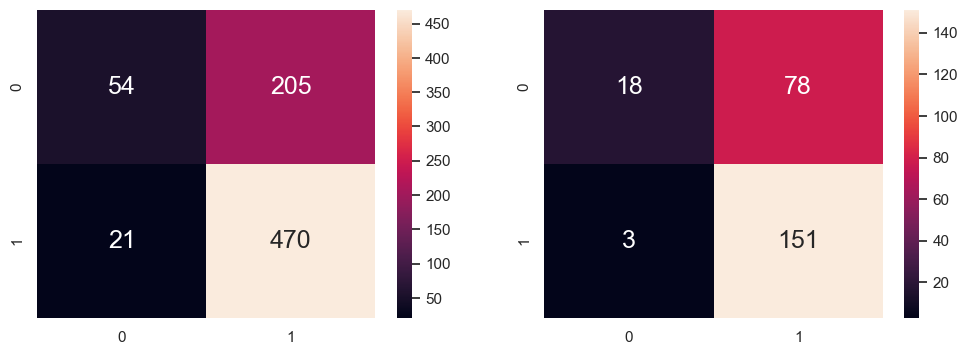

In [54]:
y = pd.DataFrame(studydata['lunchbool'])
X = pd.DataFrame(studydata[["math_score", "reading_score", "writing_score", "total_score"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

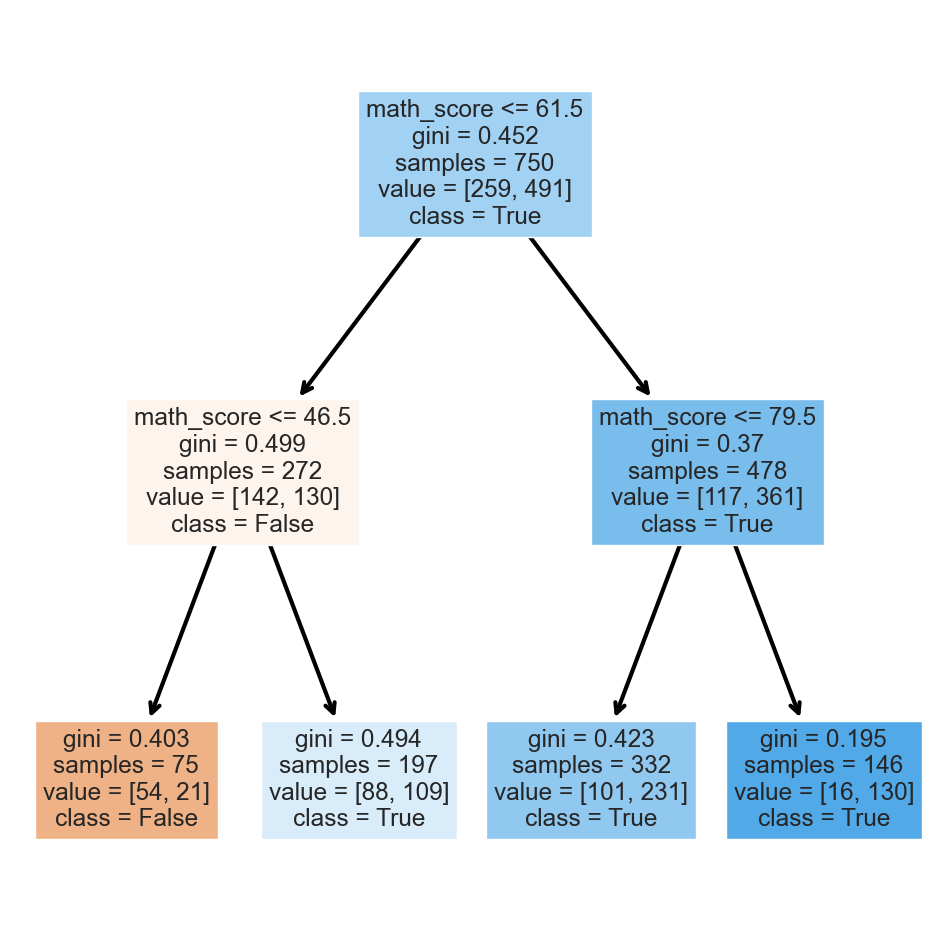

In [55]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7186666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.68



<Axes: >

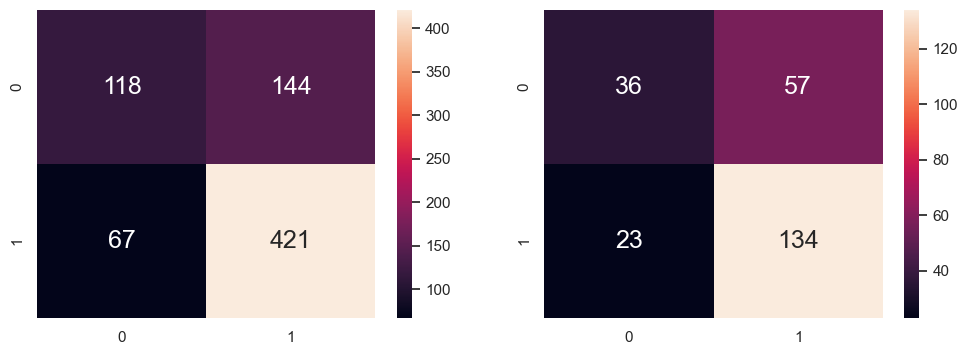

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Response Variable : **testbool**     
Predictor Feature : **reading_score, writing_score, math_score, total_score**       

In [57]:
studydata['testbool'] = studydata['test_preparation_course'].replace({'completed': True, 'none': False})

# Verify the changes
print(studydata.head())


   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  mean_score  median_score  race_ethnicity_encoded  lunchbool  \
0          218       72.67          72.0                       1       Tr

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6733333333333333

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7



<Axes: >

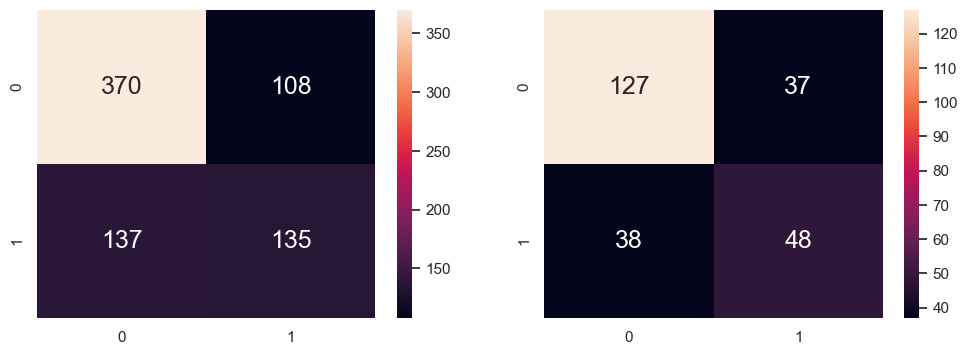

In [58]:
y = pd.DataFrame(studydata['testbool'])
X = pd.DataFrame(studydata[["math_score", "reading_score", "writing_score", "total_score"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

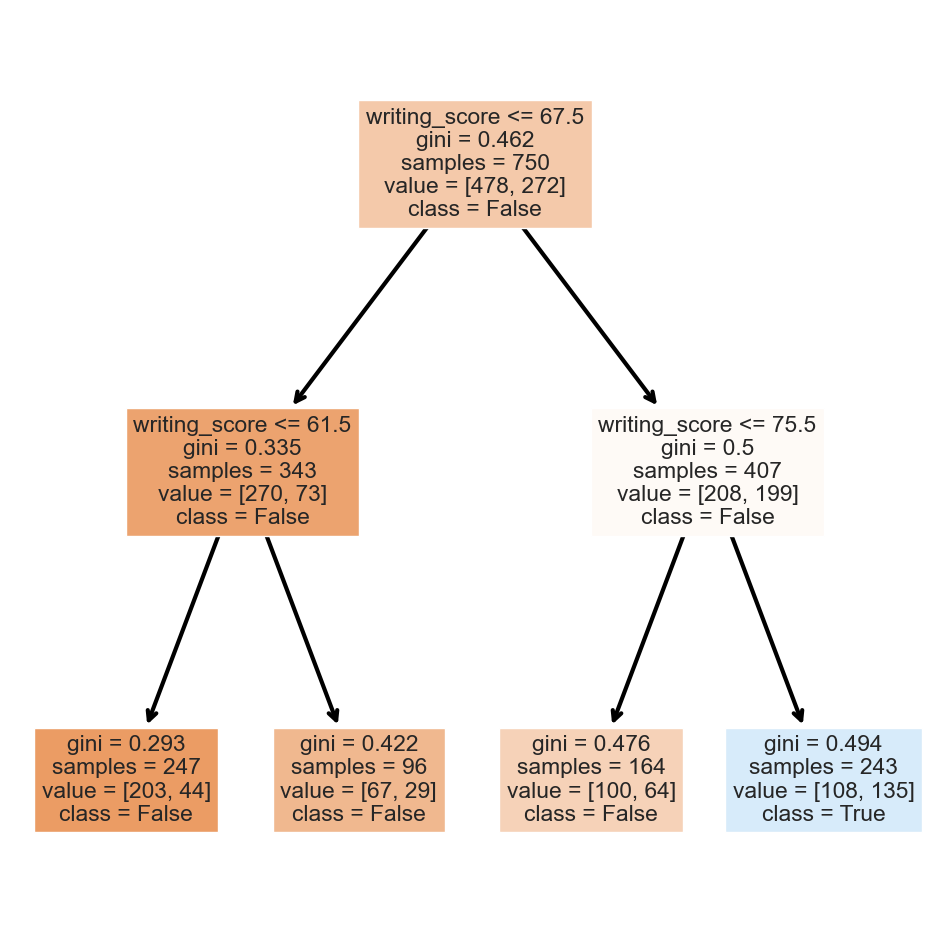

In [59]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Response Variable : **genderbool**     
Predictor Feature : **reading_score, writing_score, math_score, total_score**

In [60]:
studydata['genderbool'] = studydata['gender'].replace({'female': True, 'male': False})

# Verify the changes
print(studydata.head())


   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  mean_score  median_score  race_ethnicity_encoded  lunchbool  \
0          218       72.67          72.0                       1       Tr

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7173333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.712



<Axes: >

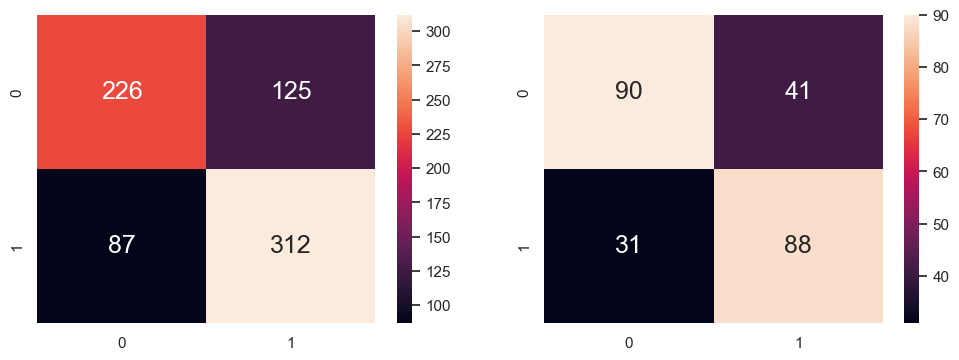

In [61]:
y = pd.DataFrame(studydata['genderbool'])
X = pd.DataFrame(studydata[["math_score", "reading_score", "writing_score", "total_score"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

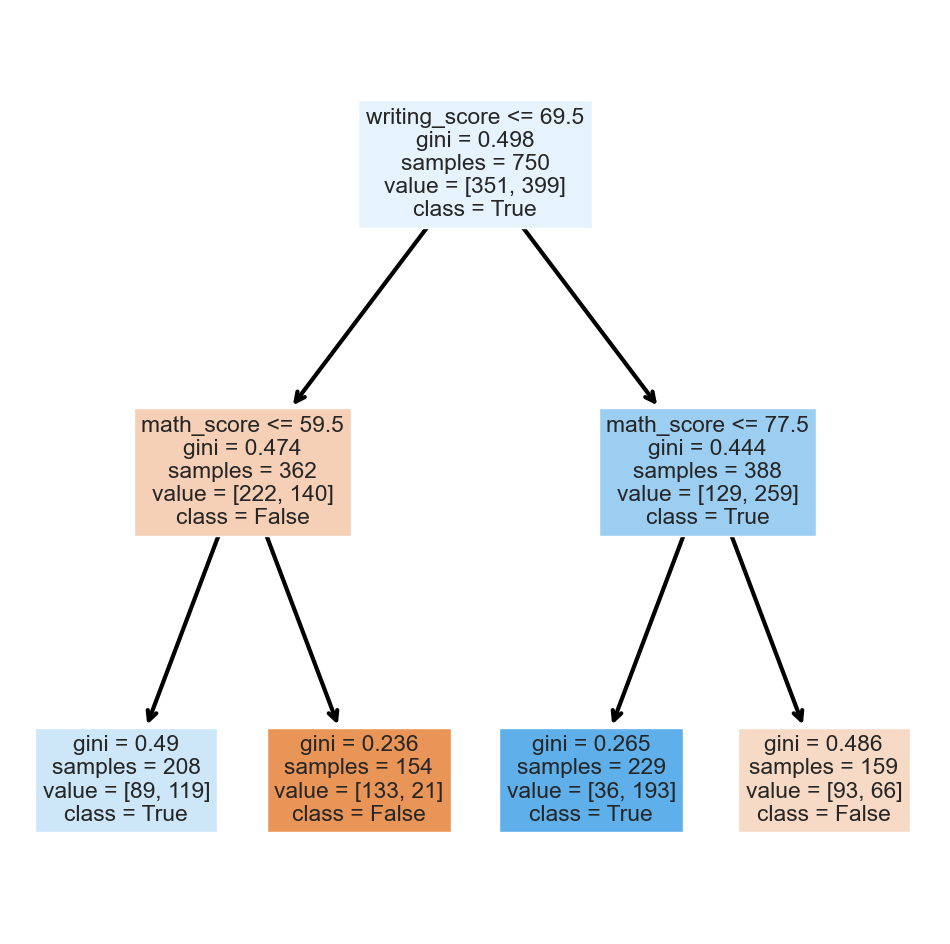

In [62]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Response Variable : **division**    
Predictor Feature : **genderbool, testbool, lunchbool**      

In [84]:
# Step 1: Calculate the 70th, 40th & 25th percentile scores
p70 = np.percentile(studydata['total_score'], 70)
p40 = np.percentile(studydata['total_score'], 40)
p25 = np.percentile(studydata['total_score'], 25)


# Step 2: Create a new column called "division" and initialize it with a default value
studydata['division'] = 'Third Division'

# Step 3: Iterate through the rows and update the "division" column
studydata.loc[studydata['total_score'] >= p70, 'division'] = 'First Division'
studydata.loc[studydata['total_score'].between(p40, p70), 'division'] = 'Second Division'
studydata.loc[studydata['total_score'].between(p25, p40), 'division'] = 'Third Division'
studydata.loc[studydata['total_score'] < p25, 'division'] = 'Fail'



# Print the updated DataFrame
studydata.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  mean_score  median_score  race_ethnicity_encoded  lunchbool  \
0          218       72.67          72.0                       1       True   
1          247       82.33          88.0                       2       True   
2          278       92.67          93.0                       1       True   
3          148       49.33          47.0                       0      False   
4          229       76.33          76.0                       2       True   

   testbool  genderbool         division  
0     False        True  Second Division  
1      True        True   First Division  
2     False        True   First Division  
3     False       False             Fail  
4     False       False   First Division

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.39066666666666666

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.376



<Axes: >

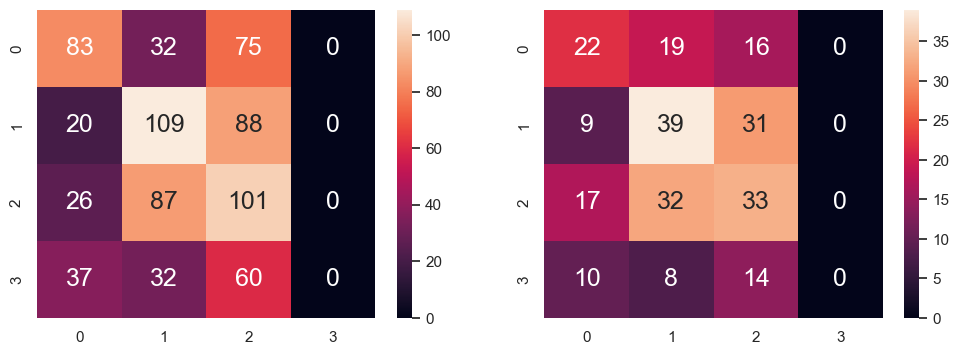

In [86]:
y = pd.DataFrame(studydata['division'])
X = pd.DataFrame(studydata[["genderbool", "testbool", "lunchbool"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

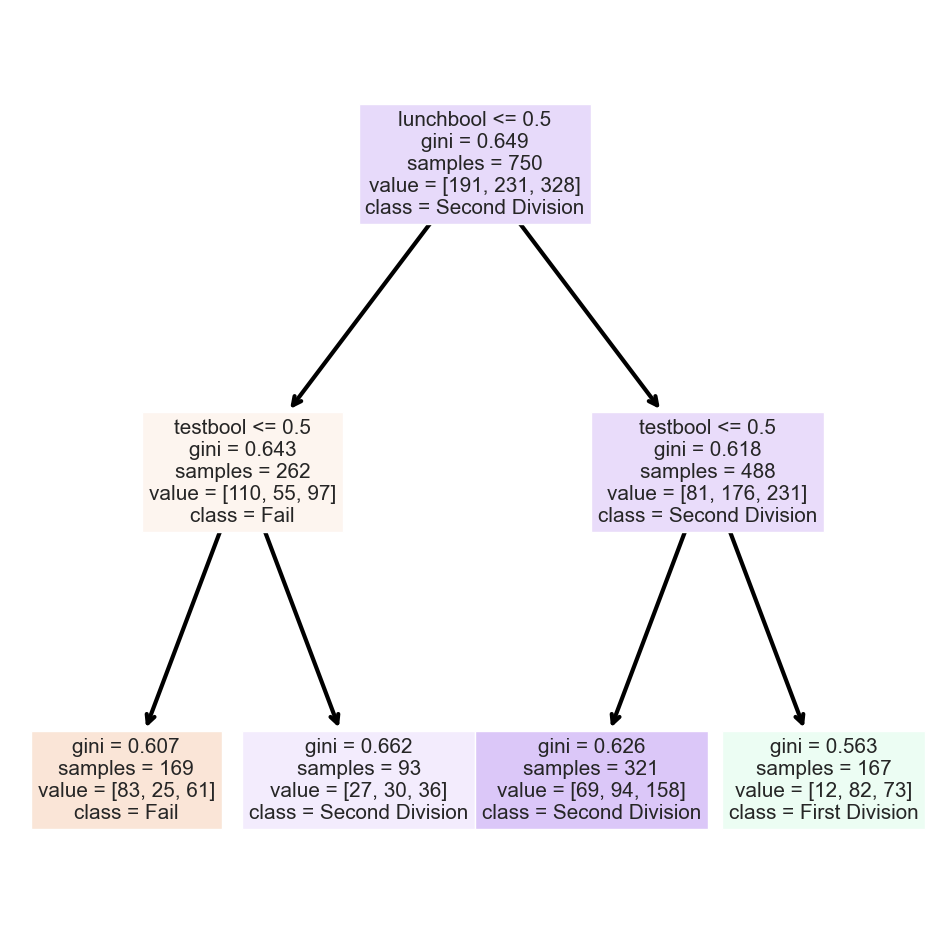

In [73]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns.tolist(),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.31733333333333336

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.332



<Axes: >

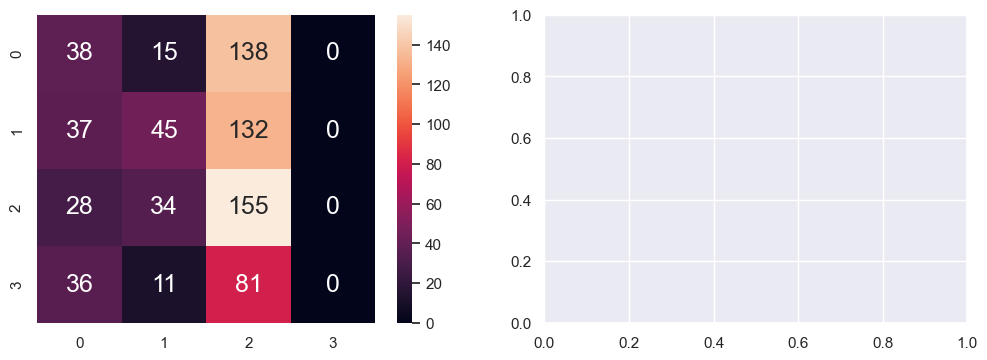

In [90]:
# Convert categorical data into numerical data using one-hot encoding
X = pd.get_dummies(studydata[['race_ethnicity']])
y = studydata['division']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Convert categorical data into numerical data using one-hot encoding
X = pd.get_dummies(studydata[['race_ethnicity']]).values
y = studydata['division'].values

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.30933333333333335

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.34



<Axes: >

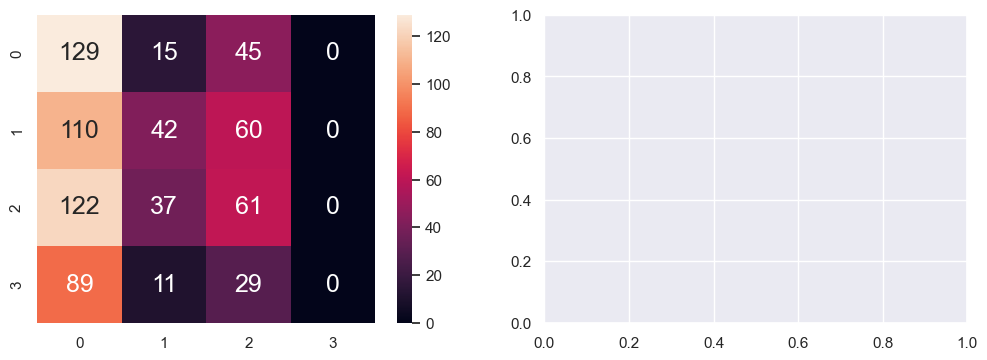

In [92]:
# Convert categorical data into numerical data using one-hot encoding
X = pd.get_dummies(studydata[['parental_level_of_education']])
y = studydata['division']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
# Convert categorical data into numerical data using one-hot encoding
X = pd.get_dummies(studydata[['race_ethnicity']]).values
y = studydata['division'].values

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.348

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.284



<Axes: >

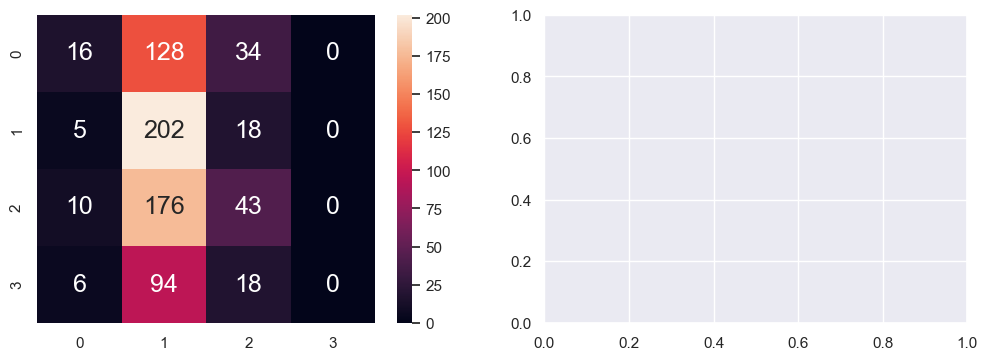

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a new dataframe with only the desired predictor variables
predictors = studydata[['race_ethnicity', 'parental_level_of_education']]

# Perform one-hot encoding on the predictor variables
ohe = OneHotEncoder()
ct = ColumnTransformer(transformers=[('encoder', ohe, ['race_ethnicity', 'parental_level_of_education'])], remainder='passthrough')
X = ct.fit_transform(predictors)
y = studydata['division']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

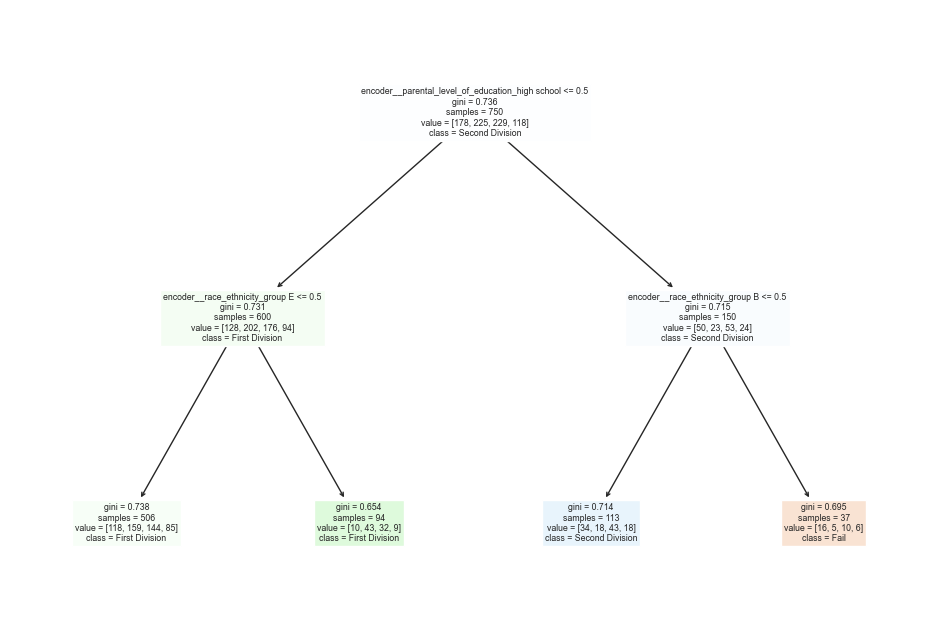

In [99]:
from sklearn import tree
import matplotlib.pyplot as plt

# Convert array of class names to a list
class_names_list = dectree.classes_.tolist()

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dectree, feature_names=feature_names_list, class_names=class_names_list, filled=True)
plt.show()




Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.356

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.308



<Axes: >

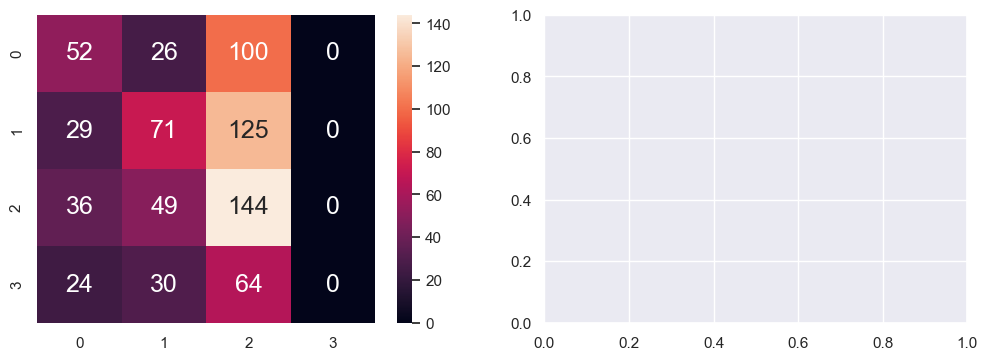

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

# Create a new dataframe with only the desired predictor variables
predictors = studydata[['race_ethnicity', 'parental_level_of_education']]

# Perform label encoding on the predictor variables
label_encoder = LabelEncoder()
predictors_encoded = predictors.apply(label_encoder.fit_transform)

X = predictors_encoded.values
y = studydata['division']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=2) # create the decision tree object
dectree.fit(X_train, y_train)          # train the decision tree model
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

